# <font color = lightcoral>Startover with basic ML Model
>    
>Startover

## <font color = grey> Admin

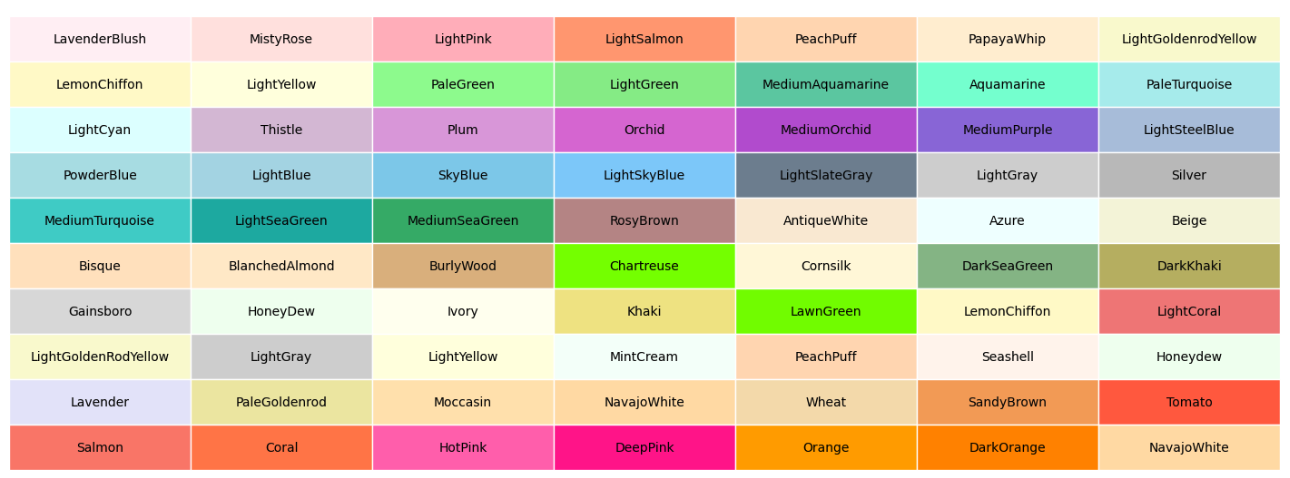

In [1]:
import pandas as pd
import os
import gzip
import time
import warnings
import os
import shutil
from datetime import datetime
# Set display option to show the full length of the column
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

In [2]:
# Determine the base directory based on the effective user ID
if os.geteuid() == 0:  # root user
    base_dir = '/root'
else:
    base_dir = '/home/sagemaker-user'

# Set the environment variable
os.environ['BASE_DIR'] = base_dir

# Verify the base directory
print(f"Base directory set to: {base_dir}")

Base directory set to: /home/sagemaker-user


___
# <font color = darkkhaki> (A) Admin

___
#### <font color = sandybrown>  Change Operation Directory

In [3]:
# # # Define the target directory
# # target_directory = os.path.join(base_dir, '02.Baseline_Models/01.StartOver_AECID_Baseline')


# # target_directory = os.path.join(base_dir, '08.GIT_Repos_REF/23.Library_Transformers_Logbert_HelenG_BGL/BGL')

# target_directory = os.path.join(base_dir, '/mnt/efs-w210-capstone/200015/08.GIT_Repos_REF/23.Library_Transformers_Logbert_HelenG_BGL/BGL')

# # # Change to the target directory
# os.chdir(target_directory)
# print(f"Changed directory to: {os.getcwd()}")

___
# <font color = darkkhaki> (B) EDA

___
## <font color = lightsteelblue>Load Dataframe and add label_binary

In [4]:
import pandas as pd
import os

# File path
file_path = os.path.join(base_dir, '/mnt/efs-w210-capstone/200015/08.GIT_Repos_REF/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl/BGL.log_structured.csv')

# Read the CSV file
df = pd.read_csv(file_path)

# Add 'label_binary' column
df['label_binary'] = df['Label'].apply(lambda x: 0 if x == '-' else 1)

# Display the first few rows to verify the new column
# print(df.head())
display(df.head())

,LineId,Label,Id,Date,Code1,Time,Code2,Component1,Component2,Level,Content,EventId,EventTemplate,label_binary
0,1,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.363779,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected,0
1,2,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.527847,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected,0
2,3,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.675872,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected,0
3,4,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.823719,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected,0
4,5,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.982731,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected,0


## <font color = lightsteelblue>EDA of Parsed File

---

In [5]:
# import pandas as pd
# import time

# # Define the path to the CSV file
# # file_path = "/root/08.GIT_Repos_REF/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl/BGL.log_structured.csv"

# # file_path = os.path.join(base_dir, '/mnt/efs-w210-capstone/200015/08.GIT_Repos_REF/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl/BGL.log_structured.csv')

# # # Start timing
# start_time = time.time()

# # # Read the CSV file
# # df = pd.read_csv(file_path)

# # Section 1: Preview
# print("\n" + "*"*100)
# print("********************** Section 1: Preview ******************************************")
# print("*"*100 + "\n")
# display(df.head())

# # Section 2: Shape of the DataFrame
# print("\n" + "*"*100)
# print("********************** Section 2: Shape of the DataFrame ****************************")
# print("*"*100 + "\n")
# print(df.shape)

# # Section 3: DataFrame Information
# print("\n" + "*"*100)
# print("********************** Section 3: DataFrame Information ****************************")
# print("*"*100 + "\n")
# print(df.info())

# # Section 4: Summary Statistics (without scientific notation)
# print("\n" + "*"*100)
# print("********************** Section 4: Summary Statistics *******************************")
# print("*"*100 + "\n")
# pd.options.display.float_format = '{:,.0f}'.format
# print(df.describe())

# # Section 5: Unique Event Templates
# print("\n" + "*"*100)
# print("********************** Section 5: Unique Event Templates ***************************")
# print("*"*100 + "\n")
# print(df['EventTemplate'].nunique())

# # # Section 6: Count of Each Event Template
# # print("\n" + "*"*100)
# # print("********************** Section 6: Count of Each Event Template *********************")
# # print("*"*100 + "\n")
# # print(df['EventTemplate'].value_counts().head())

# # Section 7: Most Frequent Event Templates with Counts (ordered by occurrences)
# print("\n" + "*"*100)
# print("********************** Section 7: Most Frequent Event Templates *********************")
# print("*"*100 + "\n")
# df_sorted = df.groupby(['EventId', 'EventTemplate']).size().reset_index(name='Occurrences')
# df_sorted = df_sorted.sort_values(by='Occurrences', ascending=False).reset_index(drop=True)
# df_sorted.index += 1  # Make the index start from 1
# print(df_sorted.head())

# # Section 8: Alert Analysis
# print("\n" + "*"*100)
# print("********************** Section 8: Alert Analysis ************************************")
# print("*"*100 + "\n")

# # Count of normal vs alert logs
# label_counts = df['Label'].value_counts()
# print(f"Normal logs: {label_counts.get('-', 0)}")
# print(f"Alert logs: {label_counts.sum() - label_counts.get('-', 0)}")

# # Most frequent labels for alerts
# alert_labels = df[df['Label'] != '-']['Label'].value_counts().head()
# print("\nMost frequent alert labels:")
# print(alert_labels)

# # Distribution of alert levels
# alert_levels = df[df['Label'] != '-']['Level'].value_counts()
# print("\nDistribution of alert levels:")
# print(alert_levels)

# # Section 9: Label and Alert Level Analysis
# print("\n" + "*"*100)
# print("********************** Section 9: Label and Alert Level Analysis ********************")
# print("*"*100 + "\n")

# # Distribution of values in the Label column with an indicator for normal or alert
# df['LogType'] = df['Label'].apply(lambda x: 'Normal' if x == '-' else 'Alert')
# label_distribution = df.groupby(['LogType', 'Label']).size()
# print("\nDistribution of values in the Label column with an indicator for normal or alert:")
# display(label_distribution)

# # Distribution of values in the Level column for alerts
# alert_level_distribution = df[df['LogType'] == 'Alert'].groupby('Level').size().reset_index(name='count')
# alert_level_distribution['LogType'] = 'Alert'
# print("\nDistribution of values in the Level column for alerts:")
# display(alert_level_distribution[['LogType', 'Level', 'count']])

# # Distribution of values in the Level column for normal logs with an indicator for normal or alert
# normal_level_distribution = df[df['LogType'] == 'Normal'].groupby('Level').size().reset_index(name='count')
# normal_level_distribution['LogType'] = 'Normal'
# print("\nDistribution of values in the Level column for normal logs with an indicator for normal or alert:")
# display(normal_level_distribution[['LogType', 'Level', 'count']])

# # Section 10: Combined LogType, Label, Level, and Count
# print("\n" + "*"*100)
# print("********************** Section 10: Combined LogType, Label, Level, and Count ********")
# print("*"*100 + "\n")

# combined_distribution = df.groupby(['LogType', 'Label', 'Level']).size().reset_index(name='count')
# combined_distribution = combined_distribution.sort_values(by=['LogType', 'count', 'Label'], ascending=[False, False, True])
# display(combined_distribution)

# # Section 11: Count Unique Values in Each Column
# print("\n" + "*"*100)
# print("********************** Section 11: Count Unique Values in Each Column ****************")
# print("*"*100 + "\n")
# print(df.nunique())

# # Section 12: Random Sample of 10 Alert Rows
# print("\n" + "*"*100)
# print("********************** Section 12: Random Sample of 10 Alert Rows ********************")
# print("*"*100 + "\n")
# alert_rows = df[df['Label'] != '-']
# sample_alert_rows = alert_rows.sample(n=10) if len(alert_rows) >= 10 else alert_rows
# display(sample_alert_rows)

# # # Section 13: Analysis of Rows for Normal and Alert Labels
# # print("\n" + "*"*100)
# # print("********************** Section 13: Analysis of Rows for Normal and Alert Labels ********")
# # print("*"*100 + "\n")

# # # Grouping by LogType to count rows for Normal and Alert logs
# # logtype_counts = df['LogType'].value_counts()
# # total_logs = logtype_counts.sum()
# # normal_percentage = (logtype_counts['Normal'] / total_logs) * 100
# # alert_percentage = (logtype_counts['Alert'] / total_logs) * 100

# # print(f"Normal logs: {logtype_counts['Normal']} ({normal_percentage:.2f}%)")
# # print(f"Alert logs: {logtype_counts['Alert']} ({alert_percentage:.2f}%)")

# # End timing
# end_time = time.time()
# duration = end_time - start_time
# print("\n" + "_"*100)
# print(f"\nTime taken: {duration:.2f} seconds")
# print("\n" + "_"*100)

___
# <font color = darkkhaki> (C). Feature Engg - Advanced (TBD)

## <font color = lightsteelblue>TBD

___
# <font color = darkkhaki> M1. Logistic Regression - Basic

In [6]:
# import pandas as pd
# import os
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from sklearn.preprocessing import OneHotEncoder
# import pickle
# import matplotlib.pyplot as plt
# import seaborn as sns
# import time

# # Start timing
# start_time = time.time()

# # ********** Section 1: Feature Engineering **********

# # Select relevant features and target
# features = df[['Component1', 'Component2', 'Level']]
# target = df['label_binary']

# # One-hot encode categorical features
# encoder = OneHotEncoder(sparse=False)
# features_encoded = encoder.fit_transform(features)

# print("\n" + "_"*100)
# print("Feature Engineering Completed")
# print("\n" + "_"*100)
# # ********** Section 2: Split Training/Test **********

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

# print("Data Splitting Completed")
# print("\n" + "_"*100)
# # ********** Section 3: Train **********

# # Initialize and train the logistic regression model
# model = LogisticRegression()
# model.fit(X_train, y_train)

# print("Model Training Completed")
# print("\n" + "_"*100)
# # ********** Section 4: Save Model Locally **********

# # Create the directory if it doesn't exist
# save_dir = '/mnt/efs-w210-capstone/200015/09.Models/20240625_Baseline_LogisticRegression'
# os.makedirs(save_dir, exist_ok=True)

# # Save the model
# model_path = os.path.join(save_dir, 'logistic_regression_model.pkl')
# with open(model_path, 'wb') as model_file:
#     pickle.dump(model, model_file)

# print(f"Model saved to {save_dir}")
# print("\n" + "_"*100)

# # ********** Section 5: Load Saved Model **********


# # File path for loading the model
# model_path = '/mnt/efs-w210-capstone/200015/09.Models/20240625_Baseline_LogisticRegression/logistic_regression_model.pkl'

# # Load the model
# with open(model_path, 'rb') as model_file:
#     model_loaded = pickle.load(model_file)

# print("Model Loading from Local Completed")
# print("\n" + "_"*100)

# # ********** Section 6: Review Model **********

# # Print model attributes
# print("Model coefficients:", model_loaded.coef_)
# print("Model intercept:", model_loaded.intercept_)
# print("Classes:", model_loaded.classes_)
# print("Number of iterations:", model_loaded.n_iter_)

# print("Model Review Completed")
# print("\n" + "_"*100)

# # ********** Section 7: Analyze **********

# # Make predictions on the test set
# y_pred = model_loaded.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)

# print(f'Accuracy: {accuracy}')
# print(f'Classification Report:\n{report}')

# # Confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)
# print(f'Confusion Matrix:\n{conf_matrix}')

# # Plot confusion matrix with class names
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Alert'], yticklabels=['Normal', 'Alert'])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()

# print("Analysis Completed")
# print("\n" + "_"*100)

# # End timing
# end_time = time.time()
# duration = end_time - start_time
# print("\n" + "_"*100)
# print(f"\nTotal Time taken: {duration:.2f} seconds")
# print("\n" + "_"*100)


___
___

#### <font color = tomato>Results Backup
>
> 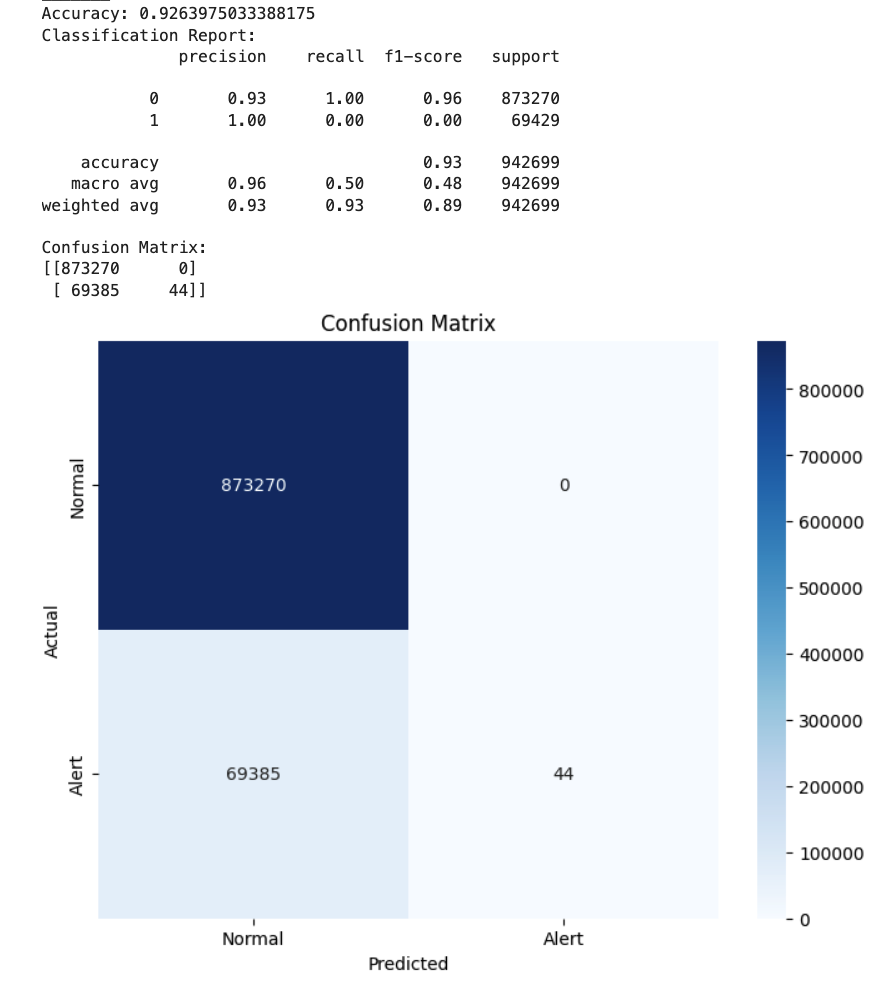

___
___

___
# <font color = darkkhaki> M2. Decision Tree - Basic

In [7]:
# import pandas as pd
# import os
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from sklearn.preprocessing import OneHotEncoder
# import pickle
# import matplotlib.pyplot as plt
# import seaborn as sns
# import time

# # Start timing
# start_time = time.time()

# # ********** Section 1: Feature Engineering **********

# # Select relevant features and target
# features = df[['Component1', 'Component2', 'Level']]
# target = df['label_binary']

# # One-hot encode categorical features
# encoder = OneHotEncoder(sparse=False)
# features_encoded = encoder.fit_transform(features)

# print("\n" + "_"*100)
# print("Feature Engineering Completed")
# print("\n" + "_"*100)

# # ********** Section 2: Split Training/Test **********

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.9, random_state=42)

# print("Data Splitting Completed")
# print("\n" + "_"*100)

# # ********** Section 3: Train **********

# # Initialize and train the Decision Tree model
# model = DecisionTreeClassifier(random_state=42)
# model.fit(X_train, y_train)

# print("Model Training Completed")
# print("\n" + "_"*100)

# # ********** Section 4: Save Model Locally **********

# # Create the directory if it doesn't exist
# save_dir = '/mnt/efs-w210-capstone/200015/09.Models/20240625_Baseline_DecisionTree'
# os.makedirs(save_dir, exist_ok=True)

# # Save the model
# model_path = os.path.join(save_dir, 'decision_tree_model.pkl')
# with open(model_path, 'wb') as model_file:
#     pickle.dump(model, model_file)

# print(f"Model saved to {save_dir}")
# print("\n" + "_"*100)

# # ********** Section 5: Load Saved Model **********

# # File path for loading the model
# model_path = '/mnt/efs-w210-capstone/200015/09.Models/20240625_Baseline_DecisionTree/decision_tree_model.pkl'

# # Load the model
# with open(model_path, 'rb') as model_file:
#     model_loaded = pickle.load(model_file)

# print("Model Loading from Local Completed")
# print("\n" + "_"*100)

# # ********** Section 6: Review Model **********

# # Print model attributes
# print("Classes:", model_loaded.classes_)
# print("Number of features:", model_loaded.n_features_in_)
# print("Feature importances:", model_loaded.feature_importances_)
# print("Tree depth:", model_loaded.get_depth())
# print("Number of leaves:", model_loaded.get_n_leaves())
# print("Model parameters:", model_loaded.get_params())

# print("Model Review Completed")
# print("\n" + "_"*100)

# # ********** Section 7: Analyze **********

# # Make predictions on the test set
# y_pred = model_loaded.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)

# print(f'Accuracy: {accuracy}')
# print(f'Classification Report:\n{report}')

# # Confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)
# print(f'Confusion Matrix:\n{conf_matrix}')

# # Plot confusion matrix with class names
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Alert'], yticklabels=['Normal', 'Alert'])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()

# print("Analysis Completed")
# print("\n" + "_"*100)

# # End timing
# end_time = time.time()
# duration = end_time - start_time
# print("\n" + "_"*100)
# print(f"\nTotal Time taken: {duration:.2f} seconds")
# print("\n" + "_"*100)

___
___

#### <font color = tomato>Results Backup
>
> 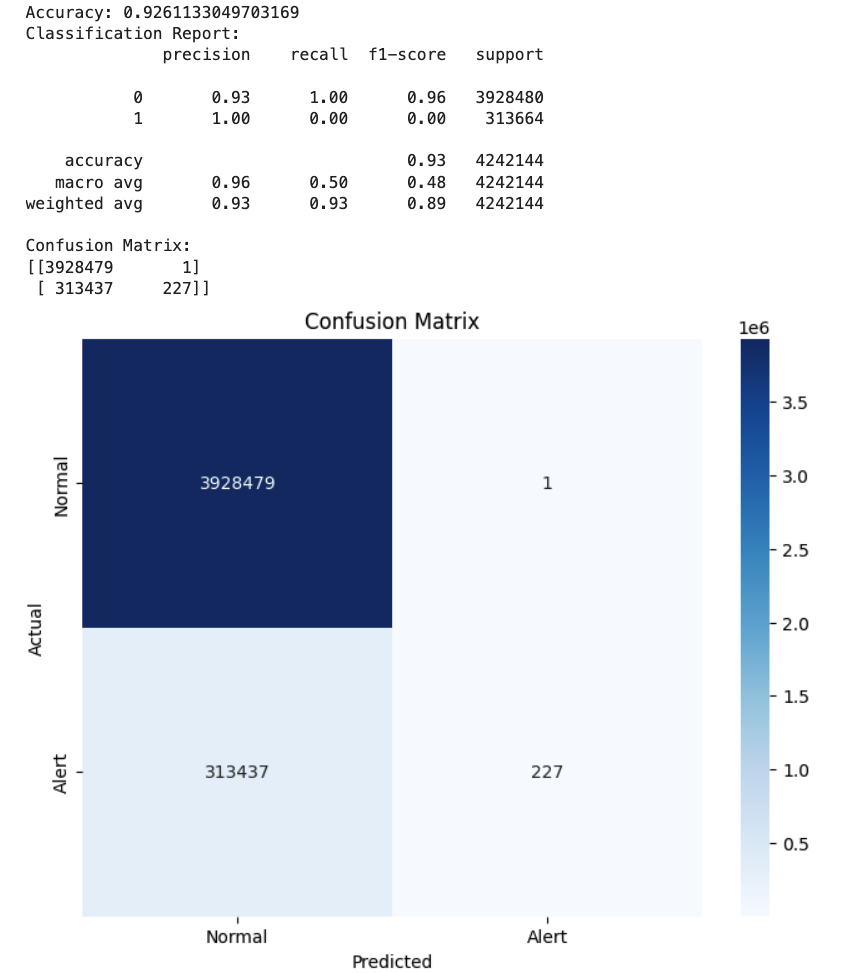

___
___

___
# <font color = darkkhaki> M3. KNN - Basic

___
## <font color = lightsteelblue>Inference for a small sample only

In [8]:
# import pandas as pd
# import os
# from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from sklearn.preprocessing import OneHotEncoder
# import pickle
# import matplotlib.pyplot as plt
# import seaborn as sns
# import time
# import numpy as np

# # Start timing
# start_time = time.time()

# # ********** Section 1: Feature Engineering **********

# # Select relevant features and target
# features = df[['Component1', 'Component2', 'Level']]
# target = df['label_binary']

# # One-hot encode categorical features
# encoder = OneHotEncoder(sparse=False)
# features_encoded = encoder.fit_transform(features)

# print("\n" + "_"*100)
# print("Feature Engineering Completed")
# print("\n" + "_"*100)

# # ********** Section 2: Split Training/Test **********

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

# print("Data Splitting Completed")
# print("\n" + "_"*100)

# # ********** Section 3: Train **********

# # Initialize and train the K-Nearest Neighbors model
# model = KNeighborsClassifier()
# model.fit(X_train, y_train)

# print("Model Training Completed")
# print("\n" + "_"*100)

# # ********** Section 4: Save Model Locally **********

# # Create the directory if it doesn't exist
# save_dir = '/mnt/efs-w210-capstone/200015/09.Models/20240625_Baseline_KNN'
# os.makedirs(save_dir, exist_ok=True)

# # Save the model
# model_path = os.path.join(save_dir, 'knn_model.pkl')
# with open(model_path, 'wb') as model_file:
#     pickle.dump(model, model_file)

# print(f"Model saved to {save_dir}")
# print("\n" + "_"*100)

# # ********** Section 5: Load Saved Model **********

# # File path for loading the model
# model_path = '/mnt/efs-w210-capstone/200015/09.Models/20240625_Baseline_KNN/knn_model.pkl'

# # Load the model
# with open(model_path, 'rb') as model_file:
#     model_loaded = pickle.load(model_file)

# print("Model Loading from Local Completed")
# print("\n" + "_"*100)

# # ********** Section 6: Review Model **********

# # Print model attributes
# print("Model parameters:", model_loaded.get_params())

# print("Model Review Completed")
# print("\n" + "_"*100)

# # ********** Section 7: Analyze **********

# # Take a small sample of the test set for prediction
# sample_size = 940000
# X_test_sample = X_test[:sample_size]
# y_test_sample = y_test[:sample_size]

# # Initialize a list to collect predictions in steps of 10
# y_pred_sample = []

# print(f'Processing {sample_size} records in steps of 10000...')

# # Make predictions in steps of 10000 records
# for i in range(0, sample_size, 10000):
#     end = i + 10000 if i + 10000 < sample_size else sample_size
#     y_pred_sample.extend(model_loaded.predict(X_test_sample[i:end]))
#     print(f'Processed {end} records...')

# # Convert predictions list to numpy array
# y_pred_sample = np.array(y_pred_sample)

# # Evaluate the model on the sample
# accuracy = accuracy_score(y_test_sample, y_pred_sample)
# report = classification_report(y_test_sample, y_pred_sample)

# print(f'Accuracy on sample: {accuracy}')
# print(f'Classification Report on sample:\n{report}')

# # Confusion matrix for the sample
# conf_matrix = confusion_matrix(y_test_sample, y_pred_sample)
# print(f'Confusion Matrix on sample:\n{conf_matrix}')

# # Plot confusion matrix with class names
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Alert'], yticklabels=['Normal', 'Alert'])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix on Sample')
# plt.show()

# print("Analysis Completed")
# print("\n" + "_"*100)

# # ********** Section 8: Display Inference Results **********

# # Create a DataFrame with the sample data
# results_df = df.iloc[y_test_sample.index].copy()

# # Add actual_label and predicted_label columns
# results_df['actual_label'] = y_test_sample
# results_df['predicted_label'] = y_pred_sample

# # Drop the label_binary column
# results_df = results_df.drop(columns=['label_binary'])

# # Display the first 10 rows of the results
# print("\n" + "*"*100)
# print("**************** Section 8: Display Inference Results **********")
# print("*"*100 + "\n")

# display(results_df.head(10))
# print("\n" + "_"*100)

# # End timing
# end_time = time.time()
# duration = end_time - start_time
# print("\n" + "_"*100)
# print(f"\nTotal Time taken: {duration:.2f} seconds")
# print("\n" + "_"*100)

___
___

#### <font color = tomato>Results Backup
>
> 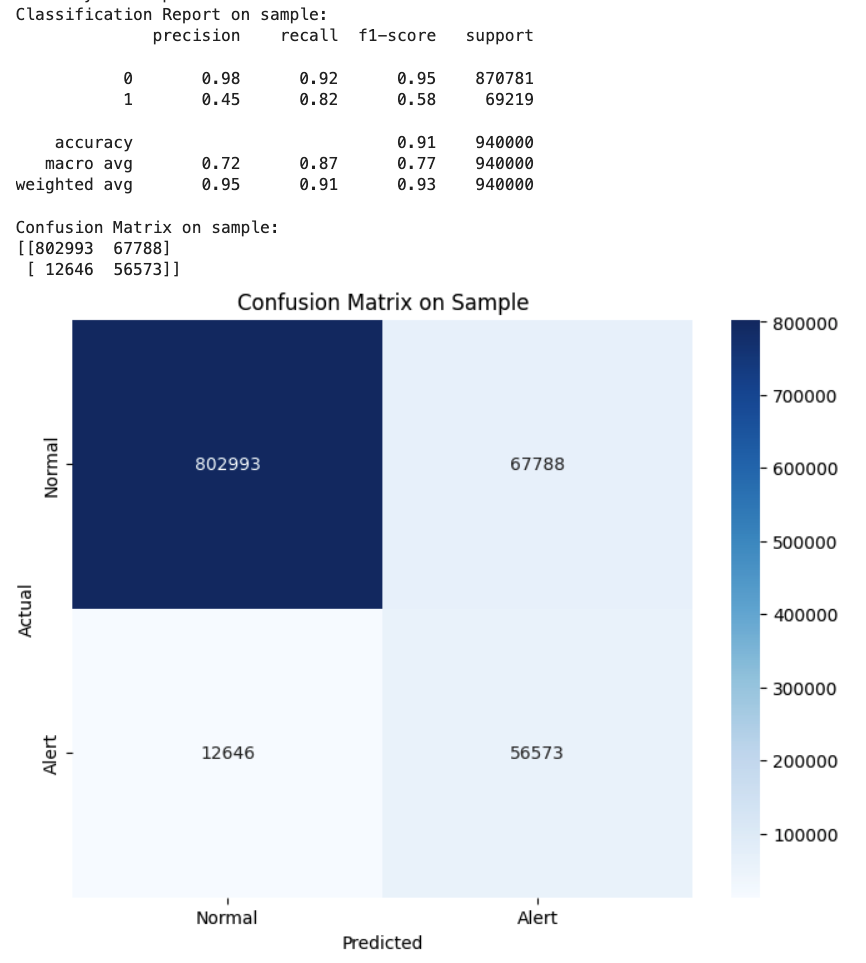

___
___

___
# <font color = darkkhaki> M4. SVM (Support Vector Machine)

In [9]:
# import pandas as pd
# import os
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from sklearn.preprocessing import OneHotEncoder
# from imblearn.under_sampling import RandomUnderSampler
# import pickle
# import matplotlib.pyplot as plt
# import seaborn as sns
# import time
# import numpy as np

# # ********** Parameters Section **********
# # total_sample_size = 1000000
# total_sample_size = len(df)
# sample_size_train_test = 100000
# sample_size_test_predictions = 10000
# step_size = 1000

# # Start timing
# start_time = time.time()

# # ********** Section 1: Feature Engineering **********

# # Select relevant features and target
# features = df[['Component1', 'Component2', 'Level']]
# target = df['label_binary']

# # One-hot encode categorical features
# encoder = OneHotEncoder(sparse=False)
# features_encoded = encoder.fit_transform(features)

# print("\n" + "_"*100)
# print("Feature Engineering Completed")
# print("\n" + "_"*100)

# # ********** Section 2: Initial Train/Test Split **********

# # Split the data into initial training and testing sets
# X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

# print("Initial Data Splitting Completed")
# print("\n" + "_"*100)

# # ********** Section 3: Sampling Strategy **********

# # Combine the training data for sampling
# X_full_sample = np.concatenate((X_train_full, X_test_full))
# y_full_sample = np.concatenate((y_train_full, y_test_full))

# # Sample size of 10000 records for training/testing, maintaining the imbalance ratio
# minority_class_count = int(sample_size_train_test * 0.1)  # 10% of 10000
# majority_class_count = sample_size_train_test - minority_class_count

# rus = RandomUnderSampler(sampling_strategy={0: majority_class_count, 1: minority_class_count}, random_state=42)
# X_sampled, y_sampled = rus.fit_resample(X_full_sample, y_full_sample)

# # Split the sampled data into training and validation sets
# X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

# print(f"Sampling Strategy Completed: Training set size {len(y_train)}, Test set size {len(y_test)}")
# print("\n" + "_"*100)

# # ********** Section 4: Train **********

# # Initialize and train the Support Vector Machine model
# model = SVC()
# model.fit(X_train, y_train)

# print("Model Training Completed")
# print("\n" + "_"*100)

# # ********** Section 5: Save Model Locally **********

# # Create the directory if it doesn't exist
# save_dir = '/mnt/efs-w210-capstone/200015/09.Models/20240625_Baseline_SVM'
# os.makedirs(save_dir, exist_ok=True)

# # Save the model
# model_path = os.path.join(save_dir, 'svm_model.pkl')
# with open(model_path, 'wb') as model_file:
#     pickle.dump(model, model_file)

# print(f"Model saved to {save_dir}")
# print("\n" + "_"*100)

# # ********** Section 6: Load Saved Model **********

# # File path for loading the model
# model_path = '/mnt/efs-w210-capstone/200015/09.Models/20240625_Baseline_SVM/svm_model.pkl'

# # Load the model
# with open(model_path, 'rb') as model_file:
#     model_loaded = pickle.load(model_file)

# print("Model Loading from Local Completed")
# print("\n" + "_"*100)

# # ********** Section 7: Review Model **********

# # Print model attributes
# print("Model parameters:", model_loaded.get_params())

# print("Model Review Completed")
# print("\n" + "_"*100)

# # ********** Section 8: Analyze **********

# # Take a small sample of the test set for prediction
# X_test_sample = X_test[:sample_size_test_predictions]
# y_test_sample = y_test[:sample_size_test_predictions]

# # Initialize a list to collect predictions in steps of `step_size`
# y_pred_sample = []

# print(f'Processing {sample_size_test_predictions} records in steps of {step_size}...')

# # Make predictions in steps of `step_size` records
# for i in range(0, sample_size_test_predictions, step_size):
#     end = i + step_size if i + step_size < sample_size_test_predictions else sample_size_test_predictions
#     y_pred_sample.extend(model_loaded.predict(X_test_sample[i:end]))
#     print(f'Processed {end} records...')

# # Convert predictions list to numpy array
# y_pred_sample = np.array(y_pred_sample)

# # Evaluate the model on the sample
# accuracy = accuracy_score(y_test_sample, y_pred_sample)
# report = classification_report(y_test_sample, y_pred_sample)

# print(f'Accuracy on sample: {accuracy}')
# print(f'Classification Report on sample:\n{report}')

# # Confusion matrix for the sample
# conf_matrix = confusion_matrix(y_test_sample, y_pred_sample)
# print(f'Confusion Matrix on sample:\n{conf_matrix}')

# # Plot confusion matrix with class names
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Alert'], yticklabels=['Normal', 'Alert'])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix on Sample')
# plt.show()

# print("Analysis Completed")
# print("\n" + "_"*100)

# # ********** Section 9: Display Inference Results **********

# # Create a DataFrame with the sample data
# results_df = pd.DataFrame(X_test_sample, columns=encoder.get_feature_names_out(df[['Component1', 'Component2', 'Level']].columns))

# # Add actual_label and predicted_label columns
# results_df['actual_label'] = y_test_sample
# results_df['predicted_label'] = y_pred_sample

# # Display the first 10 rows of the results
# print("\n" + "*"*100)
# print("**************** Section 9: Display Inference Results **********")
# print("*"*100 + "\n")

# display(results_df.head(10))
# print("\n" + "_"*100)

# # End timing
# end_time = time.time()
# duration = end_time - start_time
# print("\n" + "_"*100)
# print(f"\nTotal Time taken: {duration:.2f} seconds")
# print("\n" + "_"*100)

___

#### <font color = tomato>Results Backup
>
> 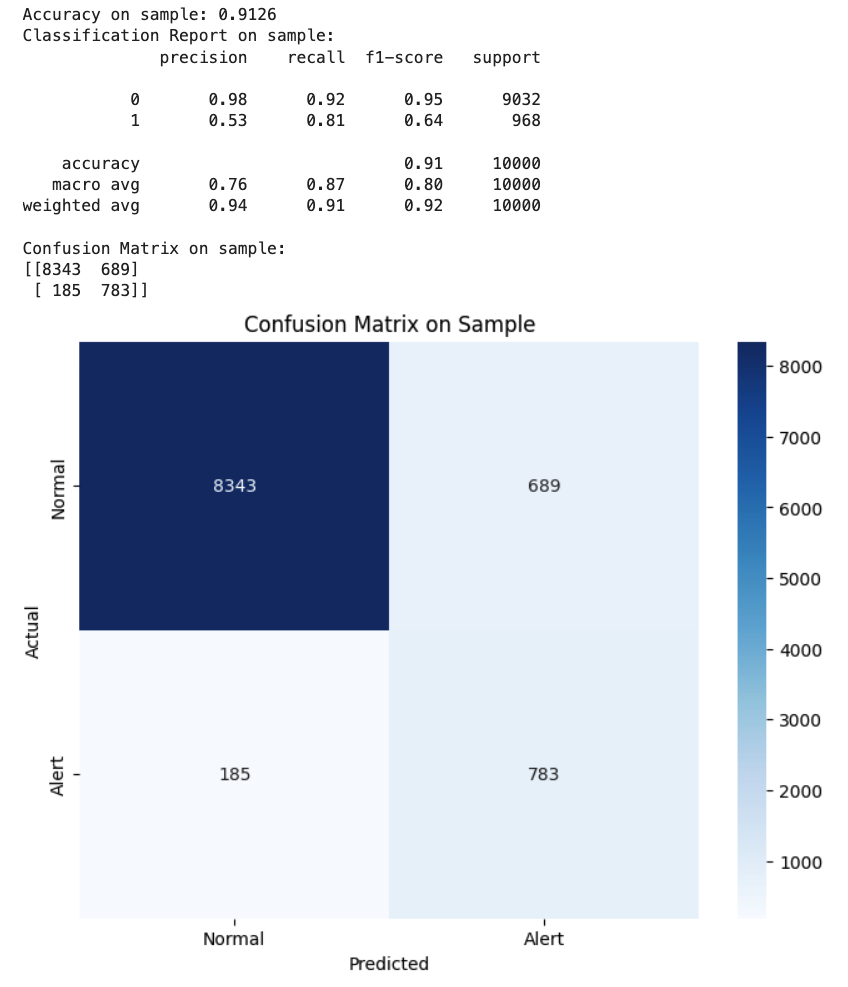


___

___
# <font color = darkkhaki> M5. Bagging Decision Tree

---

In [10]:
# import pandas as pd
# import os
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import BaggingClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from sklearn.preprocessing import OneHotEncoder
# from imblearn.under_sampling import RandomUnderSampler
# import pickle
# import matplotlib.pyplot as plt
# import seaborn as sns
# import time
# import numpy as np

# # ********** Parameters Section **********
# total_sample_size = len(df)  # Set this to len(df) to include the full dataset
# sample_size_train_test = int(0.2 * total_sample_size)
# train_test_split_ratio = 0.8  # Define the train/test split ratio
# sample_size_test_predictions = int(sample_size_train_test * (1 - train_test_split_ratio))  # Adjust based on the split ratio
# step_size = int(0.1 * sample_size_test_predictions)  # Define step size as a percentage of sample_size_test_predictions

# print('Total records:', total_sample_size)
# print('Sample size for train/test:', sample_size_train_test)
# print('Sample size for test predictions:', sample_size_test_predictions)
# print('Step size:', step_size)

# # Start timing
# start_time = time.time()

# # ********** Section 1: Feature Engineering **********

# # Select relevant features and target
# features = df[['Component1', 'Component2', 'Level']]
# target = df['label_binary']

# # One-hot encode categorical features
# encoder = OneHotEncoder(sparse=False)
# features_encoded = encoder.fit_transform(features)

# print("\n" + "_"*100)
# print("Feature Engineering Completed")
# print("Total features encoded shape:", features_encoded.shape)
# print("\n" + "_"*100)

# # ********** Section 2: Initial Train/Test Split **********

# # Split the data into initial training and testing sets
# X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(features_encoded, target, test_size=(1 - train_test_split_ratio), random_state=42)

# print("Initial Data Splitting Completed")
# print("X_train_full shape:", X_train_full.shape)
# print("X_test_full shape:", X_test_full.shape)
# print("y_train_full shape:", y_train_full.shape)
# print("y_test_full shape:", y_test_full.shape)
# print("\n" + "_"*100)

# # ********** Section 3: Sampling Strategy **********

# # Combine the training data for sampling
# X_full_sample = np.concatenate((X_train_full, X_test_full))
# y_full_sample = np.concatenate((y_train_full, y_test_full))

# print("Full sample combined shape:", X_full_sample.shape)
# print("Full sample target shape:", y_full_sample.shape)

# # Sample size of 10000 records for training/testing, maintaining the imbalance ratio
# minority_class_count = int(sample_size_train_test * 0.1)  # 10% of 100000
# majority_class_count = sample_size_train_test - minority_class_count

# print("Minority class count:", minority_class_count)
# print("Majority class count:", majority_class_count)

# rus = RandomUnderSampler(sampling_strategy={0: majority_class_count, 1: minority_class_count}, random_state=42)
# X_sampled, y_sampled = rus.fit_resample(X_full_sample, y_full_sample)

# print("Sampling Strategy Completed")
# print("X_sampled shape:", X_sampled.shape)
# print("y_sampled shape:", y_sampled.shape)
# print("\n" + "_"*100)

# # ********** Section 4: Train **********

# # Split the sampled data into training and validation sets
# X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=(1 - train_test_split_ratio), random_state=42)

# # Initialize and train the Bagging Decision Tree model
# model = BaggingClassifier(DecisionTreeClassifier(min_samples_split=10, max_depth=5), max_samples=0.5, max_features=1.0, n_estimators=10, random_state=42)
# model.fit(X_train, y_train)

# print("Model Training Completed")
# print("\n" + "_"*100)

# # ********** Section 5: Save Model Locally **********

# # Create the directory if it doesn't exist
# save_dir = '/mnt/efs-w210-capstone/200015/09.Models/20240625_Baseline_Bagging_DecisionTree'
# os.makedirs(save_dir, exist_ok=True)

# # Save the model
# model_path = os.path.join(save_dir, 'bagging_decision_tree_model.pkl')
# with open(model_path, 'wb') as model_file:
#     pickle.dump(model, model_file)

# print(f"Model saved to {save_dir}")
# print("\n" + "_"*100)

# # ********** Section 6: Load Saved Model **********

# # File path for loading the model
# model_path = '/mnt/efs-w210-capstone/200015/09.Models/20240625_Baseline_Bagging_DecisionTree/bagging_decision_tree_model.pkl'

# # Load the model
# with open(model_path, 'rb') as model_file:
#     model_loaded = pickle.load(model_file)

# print("Model Loading from Local Completed")
# print("\n" + "_"*100)

# # ********** Section 7: Review Model **********

# # Print model attributes
# print("Model parameters:", model_loaded.get_params())

# print("Model Review Completed")
# print("\n" + "_"*100)

# # ********** Section 8: Analyze **********

# # Take a small sample of the test set for prediction
# X_test_sample = X_test[:sample_size_test_predictions]
# y_test_sample = y_test[:sample_size_test_predictions]

# # Initialize a list to collect predictions in steps of `step_size`
# y_pred_sample = []

# print(f'Processing {sample_size_test_predictions} records in steps of {step_size}...')

# # Make predictions in steps of `step_size` records
# for i in range(0, sample_size_test_predictions, step_size):
#     end = i + step_size if i + step_size < sample_size_test_predictions else sample_size_test_predictions
#     y_pred_sample.extend(model_loaded.predict(X_test_sample[i:end]))
#     print(f'Processed {end} records...')

# # Convert predictions list to numpy array
# y_pred_sample = np.array(y_pred_sample)

# # Evaluate the model on the sample
# accuracy = accuracy_score(y_test_sample, y_pred_sample)
# report = classification_report(y_test_sample, y_pred_sample)

# print(f'Accuracy on sample: {accuracy}')
# print(f'Classification Report on sample:\n{report}')

# # Confusion matrix for the sample
# conf_matrix = confusion_matrix(y_test_sample, y_pred_sample)
# print(f'Confusion Matrix on sample:\n{conf_matrix}')

# # Plot confusion matrix with class names
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Alert'], yticklabels=['Normal', 'Alert'])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix on Sample')
# plt.show()

# print("Analysis Completed")
# print("\n" + "_"*100)

# # ********** Section 9: Display Inference Results **********

# # Create a DataFrame with the sample data
# results_df = pd.DataFrame(X_test_sample, columns=encoder.get_feature_names_out(df[['Component1', 'Component2', 'Level']].columns))

# # Add actual_label and predicted_label columns
# results_df['actual_label'] = y_test_sample
# results_df['predicted_label'] = y_pred_sample

# # Display the first 10 rows of the results
# print("\n" + "*"*100)
# print("**************** Section 9: Display Inference Results **********")
# print("*"*100 + "\n")

# display(results_df.head(10))
# print("\n" + "_"*100)

# # End timing
# end_time = time.time()
# duration = end_time - start_time
# print("\n" + "_"*100)
# print(f"\nTotal Time taken: {duration:.2f} seconds")
# print("\n" + "_"*100)


___

#### <font color = tomato>Data Process Explained
> 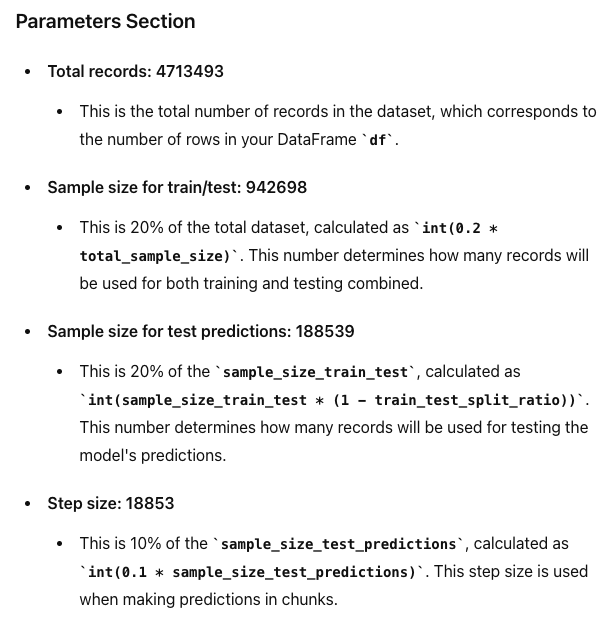
>
> 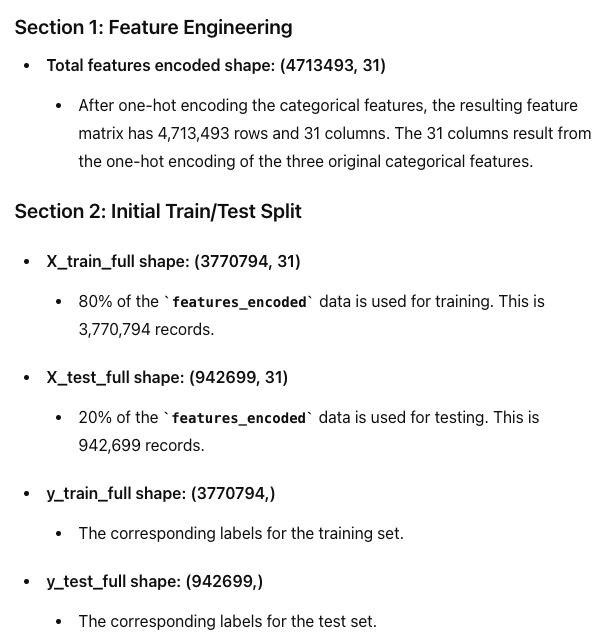
>
> 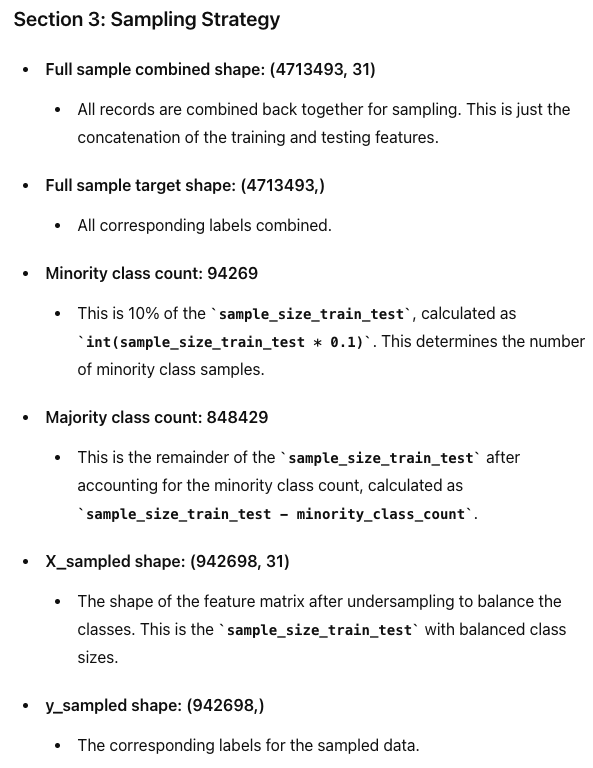
> 

___

___


#### <font color = tomato>Results Backup
> 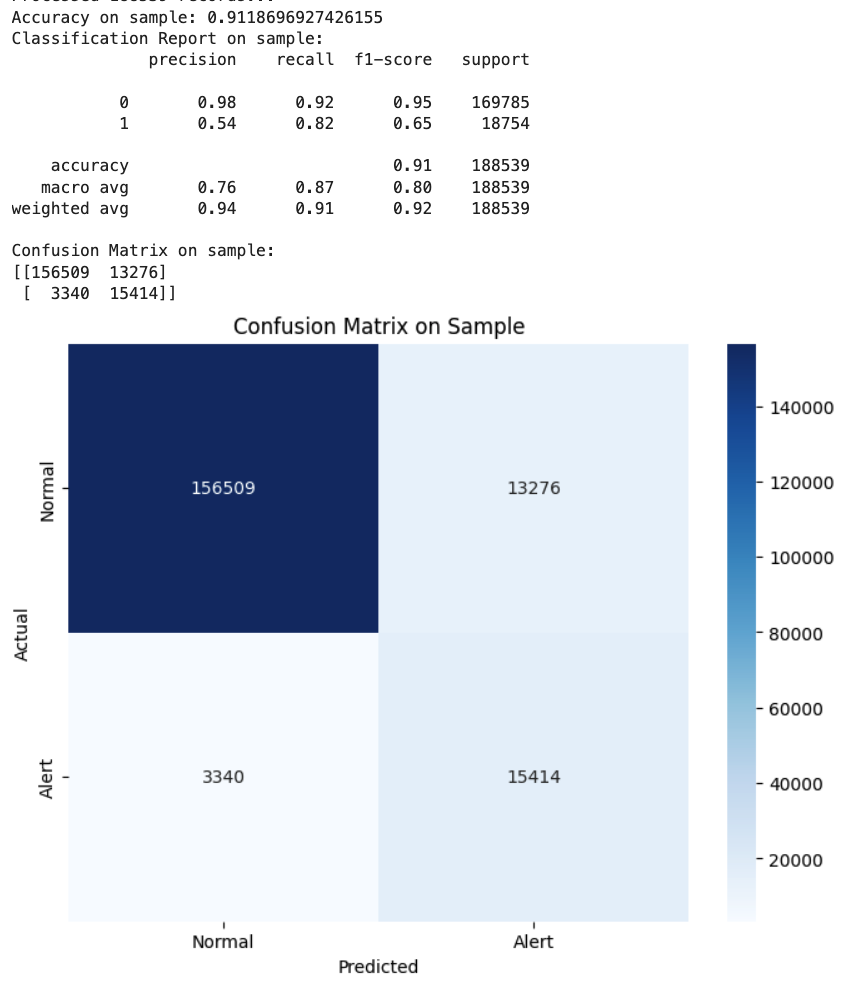
> 


___

___
# <font color = darkkhaki> M6. Boosted Decision Tree (Ensemble Learning II)

In [11]:
# import pandas as pd
# import os
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from sklearn.preprocessing import OneHotEncoder
# from imblearn.under_sampling import RandomUnderSampler
# import pickle
# import matplotlib.pyplot as plt
# import seaborn as sns
# import time
# import numpy as np

# # ********** Parameters Section **********
# total_sample_size = len(df)  # Set this to len(df) to include the full dataset
# sample_size_train_test = int(0.2 * total_sample_size)
# train_test_split_ratio = 0.8  # Define the train/test split ratio
# sample_size_test_predictions = int(sample_size_train_test * (1 - train_test_split_ratio))  # Adjust based on the split ratio
# step_size = int(0.1 * sample_size_test_predictions)  # Define step size as a percentage of sample_size_test_predictions

# print('Total records:', total_sample_size)
# print('Sample size for train/test:', sample_size_train_test)
# print('Sample size for test predictions:', sample_size_test_predictions)
# print('Step size:', step_size)

# # Start timing
# start_time = time.time()

# # ********** Section 1: Feature Engineering **********

# # Select relevant features and target
# features = df[['Component1', 'Component2', 'Level']]
# target = df['label_binary']

# # One-hot encode categorical features
# encoder = OneHotEncoder(sparse=False)
# features_encoded = encoder.fit_transform(features)

# print("\n" + "_"*100)
# print("Feature Engineering Completed")
# print("Total features encoded shape:", features_encoded.shape)
# print("\n" + "_"*100)

# # ********** Section 2: Initial Train/Test Split **********

# # Split the data into initial training and testing sets
# X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(features_encoded, target, test_size=(1 - train_test_split_ratio), random_state=42)

# print("Initial Data Splitting Completed")
# print("X_train_full shape:", X_train_full.shape)
# print("X_test_full shape:", X_test_full.shape)
# print("y_train_full shape:", y_train_full.shape)
# print("y_test_full shape:", y_test_full.shape)
# print("\n" + "_"*100)

# # ********** Section 3: Sampling Strategy **********

# # Combine the training data for sampling
# X_full_sample = np.concatenate((X_train_full, X_test_full))
# y_full_sample = np.concatenate((y_train_full, y_test_full))

# print("Full sample combined shape:", X_full_sample.shape)
# print("Full sample target shape:", y_full_sample.shape)

# # Sample size of 10000 records for training/testing, maintaining the imbalance ratio
# minority_class_count = int(sample_size_train_test * 0.1)  # 10% of 100000
# majority_class_count = sample_size_train_test - minority_class_count

# print("Minority class count:", minority_class_count)
# print("Majority class count:", majority_class_count)

# rus = RandomUnderSampler(sampling_strategy={0: majority_class_count, 1: minority_class_count}, random_state=42)
# X_sampled, y_sampled = rus.fit_resample(X_full_sample, y_full_sample)

# print("Sampling Strategy Completed")
# print("X_sampled shape:", X_sampled.shape)
# print("y_sampled shape:", y_sampled.shape)
# print("\n" + "_"*100)

# # ********** Section 4: Train **********

# # Split the sampled data into training and validation sets
# X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=(1 - train_test_split_ratio), random_state=42)

# # Initialize and train the AdaBoost model with Decision Tree base estimator
# model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=100, learning_rate=0.5, random_state=42)
# model.fit(X_train, y_train)

# print("Model Training Completed")
# print("\n" + "_"*100)

# # ********** Section 5: Save Model Locally **********

# # Create the directory if it doesn't exist
# save_dir = '/mnt/efs-w210-capstone/200015/09.Models/20240625_Baseline_AdaBoost_DecisionTree'
# os.makedirs(save_dir, exist_ok=True)

# # Save the model
# model_path = os.path.join(save_dir, 'adaboost_decision_tree_model.pkl')
# with open(model_path, 'wb') as model_file:
#     pickle.dump(model, model_file)

# print(f"Model saved to {save_dir}")
# print("\n" + "_"*100)

# # ********** Section 6: Load Saved Model **********

# # File path for loading the model
# model_path = '/mnt/efs-w210-capstone/200015/09.Models/20240625_Baseline_AdaBoost_DecisionTree/adaboost_decision_tree_model.pkl'

# # Load the model
# with open(model_path, 'rb') as model_file:
#     model_loaded = pickle.load(model_file)

# print("Model Loading from Local Completed")
# print("\n" + "_"*100)

# # ********** Section 7: Review Model **********

# # Print model attributes
# print("Model parameters:", model_loaded.get_params())

# print("Model Review Completed")
# print("\n" + "_"*100)

# # ********** Section 8: Analyze **********

# # Take a small sample of the test set for prediction
# X_test_sample = X_test[:sample_size_test_predictions]
# y_test_sample = y_test[:sample_size_test_predictions]

# # Initialize a list to collect predictions in steps of `step_size`
# y_pred_sample = []

# print(f'Processing {sample_size_test_predictions} records in steps of {step_size}...')

# # Make predictions in steps of `step_size` records
# for i in range(0, sample_size_test_predictions, step_size):
#     end = i + step_size if i + step_size < sample_size_test_predictions else sample_size_test_predictions
#     y_pred_sample.extend(model_loaded.predict(X_test_sample[i:end]))
#     print(f'Processed {end} records...')

# # Convert predictions list to numpy array
# y_pred_sample = np.array(y_pred_sample)

# # Evaluate the model on the sample
# accuracy = accuracy_score(y_test_sample, y_pred_sample)
# report = classification_report(y_test_sample, y_pred_sample)

# print(f'Accuracy on sample: {accuracy}')
# print(f'Classification Report on sample:\n{report}')

# # Confusion matrix for the sample
# conf_matrix = confusion_matrix(y_test_sample, y_pred_sample)
# print(f'Confusion Matrix on sample:\n{conf_matrix}')

# # Plot confusion matrix with class names
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Alert'], yticklabels=['Normal', 'Alert'])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix on Sample')
# plt.show()

# print("Analysis Completed")
# print("\n" + "_"*100)

# # ********** Section 9: Display Inference Results **********

# # Create a DataFrame with the sample data
# results_df = pd.DataFrame(X_test_sample, columns=encoder.get_feature_names_out(df[['Component1', 'Component2', 'Level']].columns))

# # Add actual_label and predicted_label columns
# results_df['actual_label'] = y_test_sample
# results_df['predicted_label'] = y_pred_sample

# # Display the first 10 rows of the results
# print("\n" + "*"*100)
# print("**************** Section 9: Display Inference Results **********")
# print("*"*100 + "\n")

# display(results_df.head(10))
# print("\n" + "_"*100)

# # End timing
# end_time = time.time()
# duration = end_time - start_time
# print("\n" + "_"*100)
# print(f"\nTotal Time taken: {duration:.2f} seconds")
# print("\n" + "_"*100)

___

#### <font color = tomato>Results Backup
> 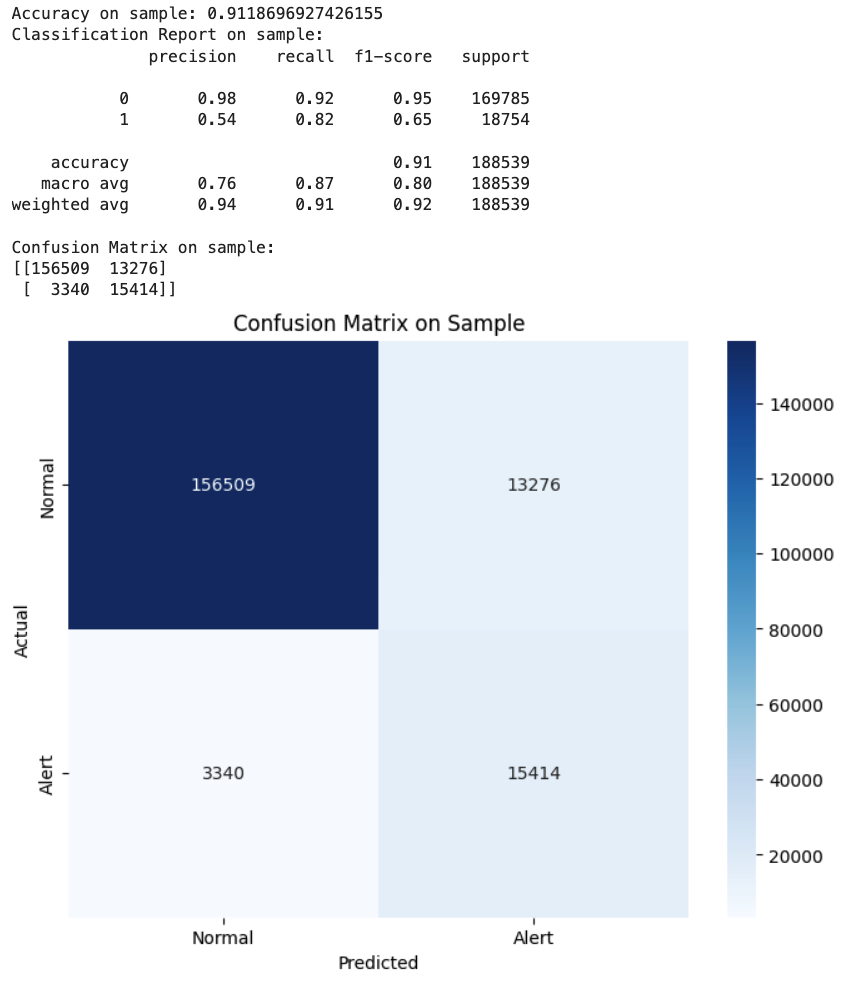
> 
___

___
# <font color = darkkhaki> M7.Random Forest (Ensemble Learning III)

In [12]:
# import pandas as pd
# import os
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from sklearn.preprocessing import OneHotEncoder
# from imblearn.under_sampling import RandomUnderSampler
# import pickle
# import matplotlib.pyplot as plt
# import seaborn as sns
# import time
# import numpy as np

# # ********** Parameters Section **********
# total_sample_size = len(df)  # Set this to len(df) to include the full dataset
# sample_size_train_test = int(0.2 * total_sample_size)
# train_test_split_ratio = 0.8  # Define the train/test split ratio
# sample_size_test_predictions = int(sample_size_train_test * (1 - train_test_split_ratio))  # Adjust based on the split ratio
# step_size = int(0.1 * sample_size_test_predictions)  # Define step size as a percentage of sample_size_test_predictions

# print('Total records:', total_sample_size)
# print('Sample size for train/test:', sample_size_train_test)
# print('Sample size for test predictions:', sample_size_test_predictions)
# print('Step size:', step_size)

# # Start timing
# start_time = time.time()

# # ********** Section 1: Feature Engineering **********

# # Select relevant features and target
# features = df[['Component1', 'Component2', 'Level']]
# target = df['label_binary']

# # One-hot encode categorical features
# encoder = OneHotEncoder(sparse=False)
# features_encoded = encoder.fit_transform(features)

# print("\n" + "_"*100)
# print("Feature Engineering Completed")
# print("Total features encoded shape:", features_encoded.shape)
# print("\n" + "_"*100)

# # ********** Section 2: Initial Train/Test Split **********

# # Split the data into initial training and testing sets
# X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(features_encoded, target, test_size=(1 - train_test_split_ratio), random_state=42)

# print("Initial Data Splitting Completed")
# print("X_train_full shape:", X_train_full.shape)
# print("X_test_full shape:", X_test_full.shape)
# print("y_train_full shape:", y_train_full.shape)
# print("y_test_full shape:", y_test_full.shape)
# print("\n" + "_"*100)

# # ********** Section 3: Sampling Strategy **********

# # Combine the training data for sampling
# X_full_sample = np.concatenate((X_train_full, X_test_full))
# y_full_sample = np.concatenate((y_train_full, y_test_full))

# print("Full sample combined shape:", X_full_sample.shape)
# print("Full sample target shape:", y_full_sample.shape)

# # Sample size of 10000 records for training/testing, maintaining the imbalance ratio
# minority_class_count = int(sample_size_train_test * 0.1)  # 10% of 100000
# majority_class_count = sample_size_train_test - minority_class_count

# print("Minority class count:", minority_class_count)
# print("Majority class count:", majority_class_count)

# rus = RandomUnderSampler(sampling_strategy={0: majority_class_count, 1: minority_class_count}, random_state=42)
# X_sampled, y_sampled = rus.fit_resample(X_full_sample, y_full_sample)

# print("Sampling Strategy Completed")
# print("X_sampled shape:", X_sampled.shape)
# print("y_sampled shape:", y_sampled.shape)
# print("\n" + "_"*100)

# # ********** Section 4: Train **********

# # Split the sampled data into training and validation sets
# X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=(1 - train_test_split_ratio), random_state=42)

# # Initialize and train the Random Forest model
# model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
# model.fit(X_train, y_train)

# print("Model Training Completed")
# print("\n" + "_"*100)

# # ********** Section 5: Save Model Locally **********

# # Create the directory if it doesn't exist
# save_dir = '/mnt/efs-w210-capstone/200015/09.Models/20240625_Baseline_RandomForest'
# os.makedirs(save_dir, exist_ok=True)

# # Save the model
# model_path = os.path.join(save_dir, 'random_forest_model.pkl')
# with open(model_path, 'wb') as model_file:
#     pickle.dump(model, model_file)

# print(f"Model saved to {save_dir}")
# print("\n" + "_"*100)

# # ********** Section 6: Load Saved Model **********

# # File path for loading the model
# model_path = '/mnt/efs-w210-capstone/200015/09.Models/20240625_Baseline_RandomForest/random_forest_model.pkl'

# # Load the model
# with open(model_path, 'rb') as model_file:
#     model_loaded = pickle.load(model_file)

# print("Model Loading from Local Completed")
# print("\n" + "_"*100)

# # ********** Section 7: Review Model **********

# # Print model attributes
# print("Model parameters:", model_loaded.get_params())

# print("Model Review Completed")
# print("\n" + "_"*100)

# # ********** Section 8: Analyze **********

# # Take a small sample of the test set for prediction
# X_test_sample = X_test[:sample_size_test_predictions]
# y_test_sample = y_test[:sample_size_test_predictions]

# # Initialize a list to collect predictions in steps of `step_size`
# y_pred_sample = []

# print(f'Processing {sample_size_test_predictions} records in steps of {step_size}...')

# # Make predictions in steps of `step_size` records
# for i in range(0, sample_size_test_predictions, step_size):
#     end = i + step_size if i + step_size < sample_size_test_predictions else sample_size_test_predictions
#     y_pred_sample.extend(model_loaded.predict(X_test_sample[i:end]))
#     print(f'Processed {end} records...')

# # Convert predictions list to numpy array
# y_pred_sample = np.array(y_pred_sample)

# # Evaluate the model on the sample
# accuracy = accuracy_score(y_test_sample, y_pred_sample)
# report = classification_report(y_test_sample, y_pred_sample)

# print(f'Accuracy on sample: {accuracy}')
# print(f'Classification Report on sample:\n{report}')

# # Confusion matrix for the sample
# conf_matrix = confusion_matrix(y_test_sample, y_pred_sample)
# print(f'Confusion Matrix on sample:\n{conf_matrix}')

# # Plot confusion matrix with class names
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Alert'], yticklabels=['Normal', 'Alert'])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix on Sample')
# plt.show()

# print("Analysis Completed")
# print("\n" + "_"*100)

# # ********** Section 9: Display Inference Results **********

# # Create a DataFrame with the sample data
# results_df = pd.DataFrame(X_test_sample, columns=encoder.get_feature_names_out(df[['Component1', 'Component2', 'Level']].columns))

# # Add actual_label and predicted_label columns
# results_df['actual_label'] = y_test_sample
# results_df['predicted_label'] = y_pred_sample

# # Display the first 10 rows of the results
# print("\n" + "*"*100)
# print("**************** Section 9: Display Inference Results **********")
# print("*"*100 + "\n")

# display(results_df.head(10))
# print("\n" + "_"*100)

# # End timing
# end_time = time.time()
# duration = end_time - start_time
# print("\n" + "_"*100)
# print(f"\nTotal Time taken: {duration:.2f} seconds")
# print("\n" + "_"*100)

___

#### <font color = tomato>Results Backup
> 
> 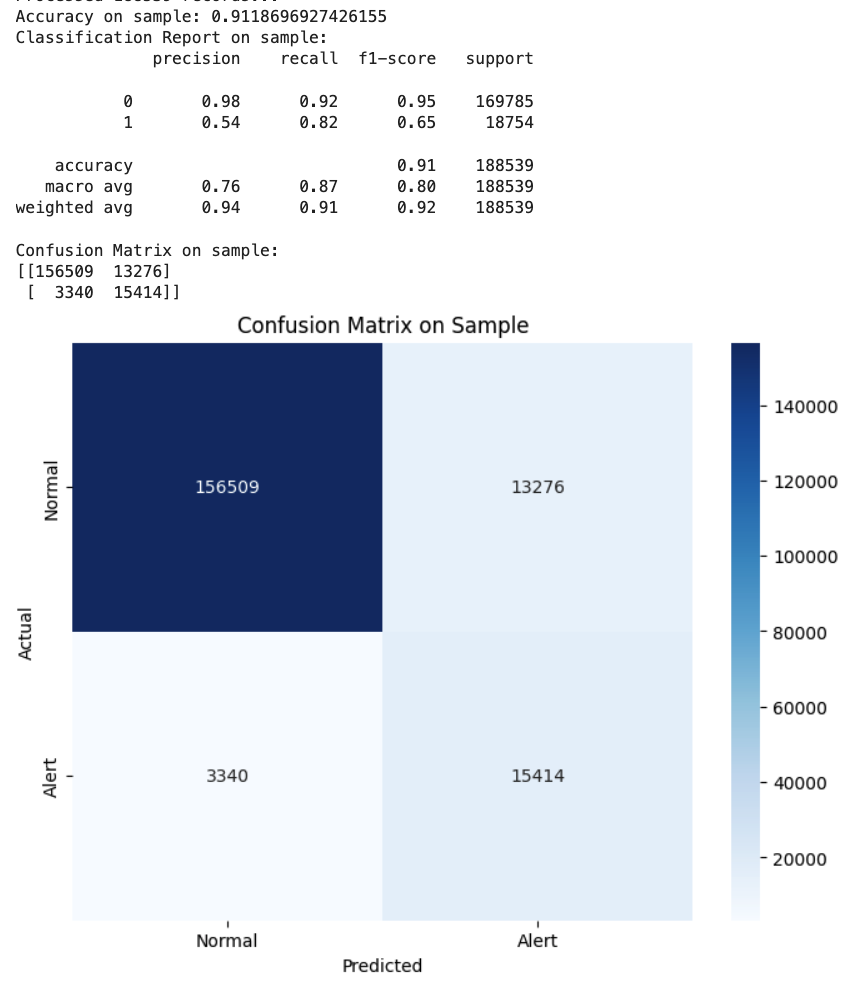
___

___
# <font color = darkkhaki> M8.Voting Classifier (Ensemble Learning IV

In [13]:
# import pandas as pd
# import os
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import VotingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from sklearn.preprocessing import OneHotEncoder
# from imblearn.under_sampling import RandomUnderSampler
# import pickle
# import matplotlib.pyplot as plt
# import seaborn as sns
# import time
# import numpy as np

# # ********** Parameters Section **********
# total_sample_size = len(0.25*len(df))  # Set this to len(df) to include the full dataset
# sample_size_train_test = int(0.2 * total_sample_size)
# train_test_split_ratio = 0.8  # Define the train/test split ratio
# sample_size_test_predictions = int(sample_size_train_test * (1 - train_test_split_ratio))  # Adjust based on the split ratio
# step_size = int(0.1 * sample_size_test_predictions)  # Define step size as a percentage of sample_size_test_predictions

# print('Total records:', total_sample_size)
# print('Sample size for train/test:', sample_size_train_test)
# print('Sample size for test predictions:', sample_size_test_predictions)
# print('Step size:', step_size)

# # Start timing
# start_time = time.time()

# # ********** Section 1: Feature Engineering **********

# # Select relevant features and target
# features = df[['Component1', 'Component2', 'Level']]
# target = df['label_binary']

# # One-hot encode categorical features
# encoder = OneHotEncoder(sparse=False)
# features_encoded = encoder.fit_transform(features)

# print("\n" + "_"*100)
# print("Feature Engineering Completed")
# print("Total features encoded shape:", features_encoded.shape)
# print("\n" + "_"*100)

# # ********** Section 2: Initial Train/Test Split **********

# # Split the data into initial training and testing sets
# X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(features_encoded, target, test_size=(1 - train_test_split_ratio), random_state=42)

# print("Initial Data Splitting Completed")
# print("X_train_full shape:", X_train_full.shape)
# print("X_test_full shape:", X_test_full.shape)
# print("y_train_full shape:", y_train_full.shape)
# print("y_test_full shape:", y_test_full.shape)
# print("\n" + "_"*100)

# # ********** Section 3: Sampling Strategy **********

# # Combine the training data for sampling
# X_full_sample = np.concatenate((X_train_full, X_test_full))
# y_full_sample = np.concatenate((y_train_full, y_test_full))

# print("Full sample combined shape:", X_full_sample.shape)
# print("Full sample target shape:", y_full_sample.shape)

# # Sample size of 10000 records for training/testing, maintaining the imbalance ratio
# minority_class_count = int(sample_size_train_test * 0.1)  # 10% of 100000
# majority_class_count = sample_size_train_test - minority_class_count

# print("Minority class count:", minority_class_count)
# print("Majority class count:", majority_class_count)

# rus = RandomUnderSampler(sampling_strategy={0: majority_class_count, 1: minority_class_count}, random_state=42)
# X_sampled, y_sampled = rus.fit_resample(X_full_sample, y_full_sample)

# print("Sampling Strategy Completed")
# print("X_sampled shape:", X_sampled.shape)
# print("y_sampled shape:", y_sampled.shape)
# print("\n" + "_"*100)

# # ********** Section 4: Train **********

# # Split the sampled data into training and validation sets
# X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=(1 - train_test_split_ratio), random_state=42)

# # Initialize and train the Voting Classifier with different base models
# model1 = LogisticRegression()
# model2 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
# model3 = SVC(probability=True)  # SVC needs probability=True for VotingClassifier with soft voting
# model = VotingClassifier(estimators=[('lr', model1), ('rf', model2), ('svc', model3)], voting='soft')

# model.fit(X_train, y_train)

# print("Model Training Completed")
# print("\n" + "_"*100)

# # ********** Section 5: Save Model Locally **********

# # Create the directory if it doesn't exist
# save_dir = '/mnt/efs-w210-capstone/200015/09.Models/20240625_Baseline_VotingClassifier'
# os.makedirs(save_dir, exist_ok=True)

# # Save the model
# model_path = os.path.join(save_dir, 'voting_classifier_model.pkl')
# with open(model_path, 'wb') as model_file:
#     pickle.dump(model, model_file)

# print(f"Model saved to {save_dir}")
# print("\n" + "_"*100)

# # ********** Section 6: Load Saved Model **********

# # File path for loading the model
# model_path = '/mnt/efs-w210-capstone/200015/09.Models/20240625_Baseline_VotingClassifier/voting_classifier_model.pkl'

# # Load the model
# with open(model_path, 'rb') as model_file:
#     model_loaded = pickle.load(model_file)

# print("Model Loading from Local Completed")
# print("\n" + "_"*100)

# # ********** Section 7: Review Model **********

# # Print model attributes
# print("Model parameters:", model_loaded.get_params())

# print("Model Review Completed")
# print("\n" + "_"*100)

# # ********** Section 8: Analyze **********

# # Take a small sample of the test set for prediction
# X_test_sample = X_test[:sample_size_test_predictions]
# y_test_sample = y_test[:sample_size_test_predictions]

# # Initialize a list to collect predictions in steps of `step_size`
# y_pred_sample = []

# print(f'Processing {sample_size_test_predictions} records in steps of {step_size}...')

# # Make predictions in steps of `step_size` records
# for i in range(0, sample_size_test_predictions, step_size):
#     end = i + step_size if i + step_size < sample_size_test_predictions else sample_size_test_predictions
#     y_pred_sample.extend(model_loaded.predict(X_test_sample[i:end]))
#     print(f'Processed {end} records...')

# # Convert predictions list to numpy array
# y_pred_sample = np.array(y_pred_sample)

# # Evaluate the model on the sample
# accuracy = accuracy_score(y_test_sample, y_pred_sample)
# report = classification_report(y_test_sample, y_pred_sample)

# print(f'Accuracy on sample: {accuracy}')
# print(f'Classification Report on sample:\n{report}')

# # Confusion matrix for the sample
# conf_matrix = confusion_matrix(y_test_sample, y_pred_sample)
# print(f'Confusion Matrix on sample:\n{conf_matrix}')

# # Plot confusion matrix with class names
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Alert'], yticklabels=['Normal', 'Alert'])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix on Sample')
# plt.show()

# print("Analysis Completed")
# print("\n" + "_"*100)

# # ********** Section 9: Display Inference Results **********

# # Create a DataFrame with the sample data
# results_df = pd.DataFrame(X_test_sample, columns=encoder.get_feature_names_out(df[['Component1', 'Component2', 'Level']].columns))

# # Add actual_label and predicted_label columns
# results_df['actual_label'] = y_test_sample
# results_df['predicted_label'] = y_pred_sample

# # Display the first 10 rows of the results
# print("\n" + "*"*100)
# print("**************** Section 9: Display Inference Results **********")
# print("*"*100 + "\n")

# display(results_df.head(10))
# print("\n" + "_"*100)

# # End timing
# end_time = time.time()
# duration = end_time - start_time
# print("\n" + "_"*100)
# print(f"\nTotal Time taken: {duration:.2f} seconds")
# print("\n" + "_"*100)

___

#### <font color = tomato>Results Backup
> 
> 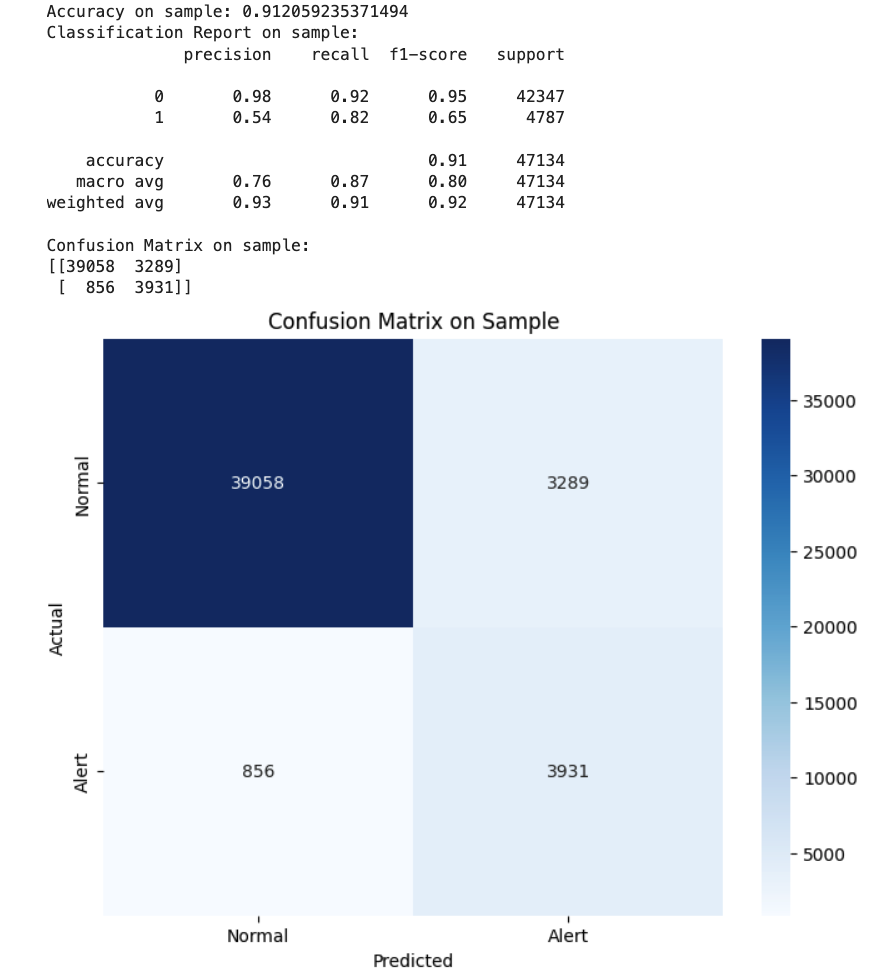
___

___
# <font color = darkkhaki> M9.Deep Learning with a Neural Network (Basic)

In [14]:
# import pandas as pd
# import os
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from imblearn.under_sampling import RandomUnderSampler
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import matplotlib.pyplot as plt
# import seaborn as sns
# import time
# import numpy as np

# # ********** Parameters Section **********
# total_sample_size = int(0.1*len(df))  # Set this to len(df) to include the full dataset
# sample_size_train_test = int(0.2 * total_sample_size)
# train_test_split_ratio = 0.8  # Define the train/test split ratio
# sample_size_test_predictions = int(sample_size_train_test * (1 - train_test_split_ratio))  # Adjust based on the split ratio
# step_size = int(0.1 * sample_size_test_predictions)  # Define step size as a percentage of sample_size_test_predictions

# print('Total records:', total_sample_size)
# print('Sample size for train/test:', sample_size_train_test)
# print('Sample size for test predictions:', sample_size_test_predictions)
# print('Step size:', step_size)

# # Start timing
# start_time = time.time()

# # ********** Section 1: Feature Engineering **********

# # Select relevant features and target
# features = df[['Component1', 'Component2', 'Level']]
# target = df['label_binary']

# # One-hot encode categorical features
# encoder = OneHotEncoder(sparse=False)
# features_encoded = encoder.fit_transform(features)

# print("\n" + "_"*100)
# print("Feature Engineering Completed")
# print("Total features encoded shape:", features_encoded.shape)
# print("\n" + "_"*100)

# # ********** Section 2: Initial Train/Test Split **********

# # Split the data into initial training and testing sets
# X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(features_encoded, target, test_size=(1 - train_test_split_ratio), random_state=42)

# print("Initial Data Splitting Completed")
# print("X_train_full shape:", X_train_full.shape)
# print("X_test_full shape:", X_test_full.shape)
# print("y_train_full shape:", y_train_full.shape)
# print("y_test_full shape:", y_test_full.shape)
# print("\n" + "_"*100)

# # ********** Section 3: Sampling Strategy **********

# # Combine the training data for sampling
# X_full_sample = np.concatenate((X_train_full, X_test_full))
# y_full_sample = np.concatenate((y_train_full, y_test_full))

# print("Full sample combined shape:", X_full_sample.shape)
# print("Full sample target shape:", y_full_sample.shape)

# # Sample size of 10000 records for training/testing, maintaining the imbalance ratio
# minority_class_count = int(sample_size_train_test * 0.1)  # 10% of 100000
# majority_class_count = sample_size_train_test - minority_class_count

# print("Minority class count:", minority_class_count)
# print("Majority class count:", majority_class_count)

# rus = RandomUnderSampler(sampling_strategy={0: majority_class_count, 1: minority_class_count}, random_state=42)
# X_sampled, y_sampled = rus.fit_resample(X_full_sample, y_full_sample)

# print("Sampling Strategy Completed")
# print("X_sampled shape:", X_sampled.shape)
# print("y_sampled shape:", y_sampled.shape)
# print("\n" + "_"*100)

# # ********** Section 4: Train **********

# # Split the sampled data into training and validation sets
# X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=(1 - train_test_split_ratio), random_state=42)

# # Convert data to PyTorch tensors
# X_train = torch.tensor(X_train, dtype=torch.float32)
# X_test = torch.tensor(X_test, dtype=torch.float32)
# y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
# y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# # Define the neural network model
# class NeuralNetwork(nn.Module):
#     def __init__(self, input_size):
#         super(NeuralNetwork, self).__init__()
#         self.fc1 = nn.Linear(input_size, 32)
#         self.fc2 = nn.Linear(32, 16)
#         self.fc3 = nn.Linear(16, 1)
#         self.relu = nn.ReLU()
#         self.sigmoid = nn.Sigmoid()

#     def forward(self, x):
#         x = self.relu(self.fc1(x))
#         x = self.relu(self.fc2(x))
#         x = self.sigmoid(self.fc3(x))
#         return x

# input_size = X_train.shape[1]
# model = NeuralNetwork(input_size)

# # Define the loss function and optimizer
# criterion = nn.BCELoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# # Train the model
# num_epochs = 10
# batch_size = 32
# model.train()

# for epoch in range(num_epochs):
#     for i in range(0, len(X_train), batch_size):
#         X_batch = X_train[i:i+batch_size]
#         y_batch = y_train[i:i+batch_size]

#         optimizer.zero_grad()
#         outputs = model(X_batch)
#         loss = criterion(outputs, y_batch)
#         loss.backward()
#         optimizer.step()

#     print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# print("Model Training Completed")
# print("\n" + "_"*100)

# # ********** Section 5: Save Model Locally **********

# # Create the directory if it doesn't exist
# save_dir = '/mnt/efs-w210-capstone/200015/09.Models/20240625_Baseline_NeuralNetwork_PyTorch'
# os.makedirs(save_dir, exist_ok=True)

# # Save the model
# model_path = os.path.join(save_dir, 'neural_network_model.pth')
# torch.save(model.state_dict(), model_path)

# print(f"Model saved to {save_dir}")
# print("\n" + "_"*100)

# # ********** Section 6: Load Saved Model **********

# # Load the model
# model_loaded = NeuralNetwork(input_size)
# model_loaded.load_state_dict(torch.load(model_path))
# model_loaded.eval()

# print("Model Loading from Local Completed")
# print("\n" + "_"*100)

# # ********** Section 7: Review Model **********

# # Print model summary
# print(model_loaded)

# print("Model Review Completed")
# print("\n" + "_"*100)

# # ********** Section 8: Analyze **********

# # Take a small sample of the test set for prediction
# X_test_sample = X_test[:sample_size_test_predictions]
# y_test_sample = y_test[:sample_size_test_predictions]

# # Initialize a list to collect predictions in steps of `step_size`
# y_pred_sample = []

# print(f'Processing {sample_size_test_predictions} records in steps of {step_size}...')

# # Make predictions in steps of `step_size` records
# with torch.no_grad():
#     for i in range(0, sample_size_test_predictions, step_size):
#         end = i + step_size if i + step_size < sample_size_test_predictions else sample_size_test_predictions
#         outputs = model_loaded(X_test_sample[i:end])
#         y_pred_sample.extend(outputs.flatten().numpy())
#         print(f'Processed {end} records...')

# # Convert predictions list to numpy array and threshold to binary values
# y_pred_sample = np.array(y_pred_sample)
# y_pred_sample = (y_pred_sample > 0.5).astype(int)

# # Evaluate the model on the sample
# accuracy = accuracy_score(y_test_sample.numpy(), y_pred_sample)
# report = classification_report(y_test_sample.numpy(), y_pred_sample)

# print(f'Accuracy on sample: {accuracy}')
# print(f'Classification Report on sample:\n{report}')

# # Confusion matrix for the sample
# conf_matrix = confusion_matrix(y_test_sample.numpy(), y_pred_sample)
# print(f'Confusion Matrix on sample:\n{conf_matrix}')

# # Plot confusion matrix with class names
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Alert'], yticklabels=['Normal', 'Alert'])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix on Sample')
# plt.show()

# print("Analysis Completed")
# print("\n" + "_"*100)

# # ********** Section 9: Display Inference Results **********

# # Create a DataFrame with the sample data
# results_df = pd.DataFrame(X_test_sample.numpy(), columns=encoder.get_feature_names_out(df[['Component1', 'Component2', 'Level']].columns))

# # Add actual_label and predicted_label columns
# results_df['actual_label'] = y_test_sample.numpy()
# results_df['predicted_label'] = y_pred_sample

# # Display the first 10 rows of the results
# print("\n" + "*"*100)
# print("**************** Section 9: Display Inference Results **********")
# print("*"*100 + "\n")

# display(results_df.head(10))
# print("\n" + "_"*100)

# # End timing
# end_time = time.time()
# duration = end_time - start_time
# print("\n" + "_"*100)
# print(f"\nTotal Time taken: {duration:.2f} seconds")
# print("\n" + "_"*100)


___

#### <font color = tomato>Results Backup
> 
> 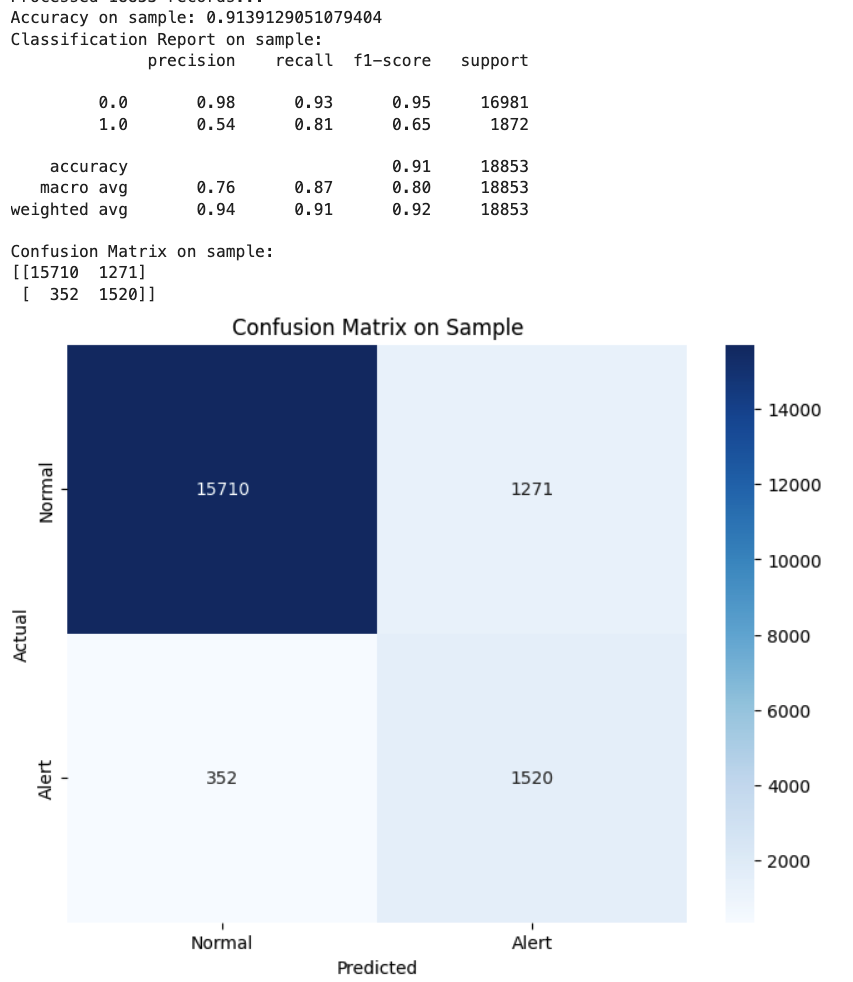
___

In [15]:
# import pandas as pd
# import os
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from imblearn.over_sampling import SMOTE
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import matplotlib.pyplot as plt
# import seaborn as sns
# import time
# import numpy as np

# # ********** Parameters Section **********
# # total_sample_size = int(1.0*(len(df))  # Set this to len(df) to include the full dataset

# total_sample_size = len(df)
# sample_size_train_test = int(0.2 * total_sample_size)
# train_test_split_ratio = 0.8  # Define the train/test split ratio
# sample_size_test_predictions = int(sample_size_train_test * (1 - train_test_split_ratio))  # Adjust based on the split ratio
# step_size = int(0.1 * sample_size_test_predictions)  # Define step size as a percentage of sample_size_test_predictions

# # Hyperparameters for the neural network
# input_size = 31  # This should match the number of features after one-hot encoding
# hidden_size_1 = 64
# hidden_size_2 = 32
# num_epochs = 20
# batch_size = 32
# learning_rate = 0.001

# print('Total records:', total_sample_size)
# print('Sample size for train/test:', sample_size_train_test)
# print('Sample size for test predictions:', sample_size_test_predictions)
# print('Step size:', step_size)

# # Start timing
# start_time = time.time()

# # ********** Section 1: Feature Engineering **********

# # Select relevant features and target
# features = df[['Component1', 'Component2', 'Level']]
# target = df['label_binary']

# # One-hot encode categorical features
# encoder = OneHotEncoder(sparse=False)
# features_encoded = encoder.fit_transform(features)

# print("\n" + "_"*100)
# print("Feature Engineering Completed")
# print("Total features encoded shape:", features_encoded.shape)
# print("\n" + "_"*100)

# # ********** Section 2: Initial Train/Test Split **********

# # Split the data into initial training and testing sets
# X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(features_encoded, target, test_size=(1 - train_test_split_ratio), random_state=42)

# print("Initial Data Splitting Completed")
# print("X_train_full shape:", X_train_full.shape)
# print("X_test_full shape:", X_test_full.shape)
# print("y_train_full shape:", y_train_full.shape)
# print("y_test_full shape:", y_test_full.shape)
# print("\n" + "_"*100)

# # ********** Section 3: SMOTE for Balancing the Dataset **********

# # Combine the training data for sampling
# X_full_sample = np.concatenate((X_train_full, X_test_full))
# y_full_sample = np.concatenate((y_train_full, y_test_full))

# print("Full sample combined shape:", X_full_sample.shape)
# print("Full sample target shape:", y_full_sample.shape)

# # Sample size for training/testing, maintaining the imbalance ratio
# minority_class_count = int(sample_size_train_test * 0.1)  # 10% of 100000
# majority_class_count = sample_size_train_test - minority_class_count

# print("Minority class count:", minority_class_count)
# print("Majority class count:", majority_class_count)

# smote = SMOTE(sampling_strategy=0.1, random_state=42)
# X_sampled, y_sampled = smote.fit_resample(X_full_sample, y_full_sample)

# print("SMOTE Sampling Strategy Completed")
# print("X_sampled shape:", X_sampled.shape)
# print("y_sampled shape:", y_sampled.shape)
# print("\n" + "_"*100)

# # ********** Section 4: Train/Test Split for Sampled Data **********

# # Split the sampled data into training and validation sets
# X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=(1 - train_test_split_ratio), random_state=42)

# print("Train/Test Split for Sampled Data Completed")
# print("X_train shape:", X_train.shape)
# print("X_test shape:", X_test.shape)
# print("y_train shape:", y_train.shape)
# print("y_test shape:", y_test.shape)
# print("\n" + "_"*100)

# # ********** Section 5: Train Neural Network **********

# # Convert data to PyTorch tensors
# X_train = torch.tensor(X_train, dtype=torch.float32)
# X_test = torch.tensor(X_test, dtype=torch.float32)
# y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
# y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# # Define the neural network model
# class NeuralNetwork(nn.Module):
#     def __init__(self, input_size, hidden_size_1, hidden_size_2):
#         super(NeuralNetwork, self).__init__()
#         self.fc1 = nn.Linear(input_size, hidden_size_1)
#         self.fc2 = nn.Linear(hidden_size_1, hidden_size_2)
#         self.fc3 = nn.Linear(hidden_size_2, 1)
#         self.relu = nn.ReLU()
#         self.sigmoid = nn.Sigmoid()

#     def forward(self, x):
#         x = self.relu(self.fc1(x))
#         x = self.relu(self.fc2(x))
#         x = self.sigmoid(self.fc3(x))
#         return x

# model = NeuralNetwork(input_size, hidden_size_1, hidden_size_2)

# # Define the loss function and optimizer
# criterion = nn.BCELoss()
# optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# # Train the model
# model.train()

# for epoch in range(num_epochs):
#     for i in range(0, len(X_train), batch_size):
#         X_batch = X_train[i:i+batch_size]
#         y_batch = y_train[i:i+batch_size]

#         optimizer.zero_grad()
#         outputs = model(X_batch)
#         loss = criterion(outputs, y_batch)
#         loss.backward()
#         optimizer.step()

#     print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# print("Model Training Completed")
# print("\n" + "_"*100)

# # ********** Section 6: Save Model Locally **********

# # Create the directory if it doesn't exist
# save_dir = '/mnt/efs-w210-capstone/200015/09.Models/20240625_Baseline_NeuralNetwork_PyTorch'
# os.makedirs(save_dir, exist_ok=True)

# # Save the model
# model_path = os.path.join(save_dir, 'neural_network_model.pth')
# torch.save(model.state_dict(), model_path)

# print(f"Model saved to {save_dir}")
# print("\n" + "_"*100)

# # ********** Section 7: Load Saved Model **********

# # Load the model
# model_loaded = NeuralNetwork(input_size, hidden_size_1, hidden_size_2)
# model_loaded.load_state_dict(torch.load(model_path))
# model_loaded.eval()

# print("Model Loading from Local Completed")
# print("\n" + "_"*100)

# # ********** Section 8: Review Model **********

# # Print model summary
# print(model_loaded)

# print("Model Review Completed")
# print("\n" + "_"*100)

# # ********** Section 9: Analyze **********

# # Take a small sample of the test set for prediction
# X_test_sample = X_test[:sample_size_test_predictions]
# y_test_sample = y_test[:sample_size_test_predictions]

# # Initialize a list to collect predictions in steps of `step_size`
# y_pred_sample = []

# print(f'Processing {sample_size_test_predictions} records in steps of {step_size}...')

# # Make predictions in steps of `step_size` records
# with torch.no_grad():
#     for i in range(0, sample_size_test_predictions, step_size):
#         end = i + step_size if i + step_size < sample_size_test_predictions else sample_size_test_predictions
#         outputs = model_loaded(X_test_sample[i:end])
#         y_pred_sample.extend(outputs.flatten().numpy())
#         print(f'Processed {end} records...')

# # Convert predictions list to numpy array and threshold to binary values
# y_pred_sample = np.array(y_pred_sample)
# y_pred_sample = (y_pred_sample > 0.5).astype(int)

# # Evaluate the model on the sample
# accuracy = accuracy_score(y_test_sample.numpy(), y_pred_sample)
# report = classification_report(y_test_sample.numpy(), y_pred_sample)

# print(f'Accuracy on sample: {accuracy}')
# print(f'Classification Report on sample:\n{report}')

# # Confusion matrix for the sample
# conf_matrix = confusion_matrix(y_test_sample.numpy(), y_pred_sample)
# print(f'Confusion Matrix on sample:\n{conf_matrix}')

# # Plot confusion matrix with class names
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Alert'], yticklabels=['Normal', 'Alert'])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix on Sample')
# plt.show()

# print("Analysis Completed")
# print("\n" + "_"*100)

# # ********** Section 10: Display Inference Results **********

# # Create a DataFrame with the sample data
# results_df = pd.DataFrame(X_test_sample.numpy(), columns=encoder.get_feature_names_out(df[['Component1', 'Component2', 'Level']].columns))

# # Add actual_label and predicted_label columns
# results_df['actual_label'] = y_test_sample.numpy()
# results_df['predicted_label'] = y_pred_sample

# # Display the first 10 rows of the results
# print("\n" + "*"*100)
# print("**************** Section 10: Display Inference Results **********")
# print("*"*100 + "\n")

# display(results_df.head(10))
# print("\n" + "_"*100)

# # End timing
# end_time = time.time()
# duration = end_time - start_time
# print("\n" + "_"*100)
# print(f"\nTotal Time taken: {duration:.2f} seconds")
# print("\n" + "_"*100)


___

#### <font color = tomato>Results Backup
> 
> 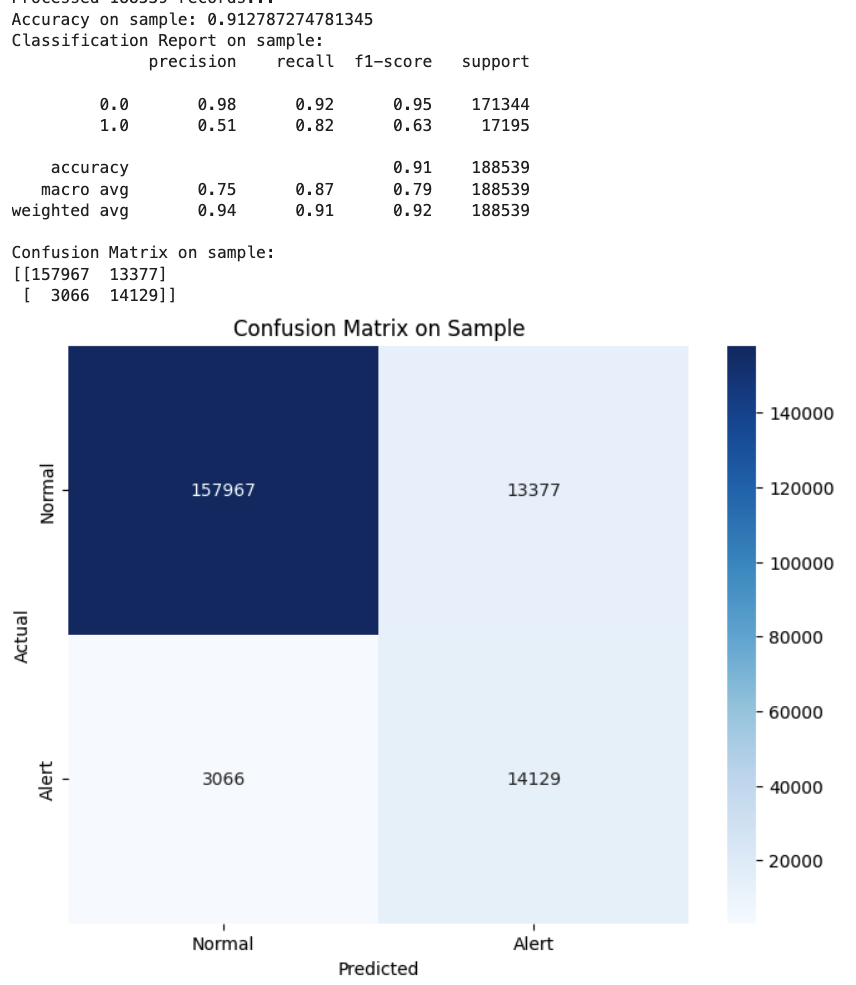
___

___
# <font color = darkkhaki> M10.LSTM (Basic)

In [16]:
# import pandas as pd
# import os
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from imblearn.over_sampling import SMOTE
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np
# import time

# # ********** Parameters Section **********
# total_sample_size = len(df)  # Set this to len(df) to include the full dataset
# sample_size_train_test = int(0.2 * total_sample_size)
# train_test_split_ratio = 0.8  # Define the train/test split ratio
# sample_size_test_predictions = int(sample_size_train_test * (1 - train_test_split_ratio))  # Adjust based on the split ratio
# step_size = int(0.1 * sample_size_test_predictions)  # Define step size as a percentage of sample_size_test_predictions
# learning_rate = 0.001
# num_epochs = 10
# hidden_size = 64
# num_layers = 2

# print('Total records:', total_sample_size)
# print('Sample size for train/test:', sample_size_train_test)
# print('Sample size for test predictions:', sample_size_test_predictions)
# print('Step size:', step_size)

# # Start timing
# start_time = time.time()

# # ********** Section 1: Feature Engineering **********

# # Select relevant features and target
# features = df[['Component1', 'Component2', 'Level']]
# target = df['label_binary']

# # One-hot encode categorical features
# encoder = OneHotEncoder(sparse=False)
# features_encoded = encoder.fit_transform(features)

# print("\n" + "_"*100)
# print("Feature Engineering Completed")
# print("Total features encoded shape:", features_encoded.shape)
# print("\n" + "_"*100)

# # ********** Section 2: Initial Train/Test Split **********

# # Split the data into initial training and testing sets
# X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(features_encoded, target, test_size=(1 - train_test_split_ratio), random_state=42)

# print("Initial Data Splitting Completed")
# print("X_train_full shape:", X_train_full.shape)
# print("X_test_full shape:", X_test_full.shape)
# print("y_train_full shape:", y_train_full.shape)
# print("y_test_full shape:", y_test_full.shape)
# print("\n" + "_"*100)

# # ********** Section 3: SMOTE for Balancing the Dataset **********

# # Combine the training data for sampling
# X_full_sample = np.concatenate((X_train_full, X_test_full))
# y_full_sample = np.concatenate((y_train_full, y_test_full))

# print("Full sample combined shape:", X_full_sample.shape)
# print("Full sample target shape:", y_full_sample.shape)

# # Sample size for training/testing, maintaining the imbalance ratio
# minority_class_count = int(sample_size_train_test * 0.1)  # 10% of 100000
# majority_class_count = sample_size_train_test - minority_class_count

# print("Minority class count:", minority_class_count)
# print("Majority class count:", majority_class_count)

# smote = SMOTE(sampling_strategy=0.1, random_state=42)
# X_sampled, y_sampled = smote.fit_resample(X_full_sample, y_full_sample)

# print("SMOTE Sampling Strategy Completed")
# print("X_sampled shape:", X_sampled.shape)
# print("y_sampled shape:", y_sampled.shape)
# print("\n" + "_"*100)

# # ********** Section 4: Train/Test Split for Sampled Data **********

# # Split the sampled data into training and validation sets
# X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=(1 - train_test_split_ratio), random_state=42)

# print("Train/Test Split for Sampled Data Completed")
# print("X_train shape:", X_train.shape)
# print("X_test shape:", X_test.shape)
# print("y_train shape:", y_train.shape)
# print("y_test shape:", y_test.shape)
# print("\n" + "_"*100)

# # ********** Section 5: Convert Data to PyTorch Tensors **********

# # Convert data to PyTorch tensors
# X_train = torch.tensor(X_train, dtype=torch.float32)
# X_test = torch.tensor(X_test, dtype=torch.float32)
# y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
# y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# print("Data Conversion to PyTorch Tensors Completed")
# print("\n" + "_"*100)

# # ********** Section 6: Define LSTM Model **********

# class LSTMNetwork(nn.Module):
#     def __init__(self, input_size, hidden_size, num_layers, output_size):
#         super(LSTMNetwork, self).__init__()
#         self.hidden_size = hidden_size
#         self.num_layers = num_layers
#         self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
#         self.fc = nn.Linear(hidden_size, output_size)
#         self.sigmoid = nn.Sigmoid()
        
#     def forward(self, x):
#         h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
#         c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
#         out, _ = self.lstm(x, (h0, c0))
#         out = self.fc(out[:, -1, :])
#         out = self.sigmoid(out)
#         return out

# input_size = X_train.shape[1]
# output_size = 1

# model = LSTMNetwork(input_size, hidden_size, num_layers, output_size)
# criterion = nn.BCELoss()
# optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# print("LSTM Model Defined")
# print("\n" + "_"*100)

# # ********** Section 7: Train the LSTM Model **********

# for epoch in range(num_epochs):
#     model.train()
#     outputs = model(X_train.unsqueeze(1))
#     loss = criterion(outputs, y_train)
    
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()
    
#     print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# print("Model Training Completed")
# print("\n" + "_"*100)

# # ********** Section 8: Save Model Locally **********

# # Create the directory if it doesn't exist
# save_dir = '/mnt/efs-w210-capstone/200015/09.Models/20240625_Baseline_LSTM_PyTorch'
# os.makedirs(save_dir, exist_ok=True)

# # Save the model
# model_path = os.path.join(save_dir, 'lstm_model.pth')
# torch.save(model.state_dict(), model_path)

# print(f"Model saved to {save_dir}")
# print("\n" + "_"*100)

# # ********** Section 9: Load Saved Model **********

# # Load the model
# model_loaded = LSTMNetwork(input_size, hidden_size, num_layers, output_size)
# model_loaded.load_state_dict(torch.load(model_path))

# print("Model Loading from Local Completed")
# print("\n" + "_"*100)

# # ********** Section 10: Review Model **********

# # Print model attributes
# print(model_loaded)

# print("Model Review Completed")
# print("\n" + "_"*100)

# # ********** Section 11: Analyze **********

# # Take a small sample of the test set for prediction
# X_test_sample = X_test[:sample_size_test_predictions]
# y_test_sample = y_test[:sample_size_test_predictions]

# # Initialize a list to collect predictions in steps of `step_size`
# y_pred_sample = []

# print(f'Processing {sample_size_test_predictions} records in steps of {step_size}...')

# # Make predictions in steps of `step_size` records
# model_loaded.eval()
# with torch.no_grad():
#     for i in range(0, sample_size_test_predictions, step_size):
#         end = i + step_size if i + step_size < sample_size_test_predictions else sample_size_test_predictions
#         outputs = model_loaded(X_test_sample[i:end].unsqueeze(1))
#         y_pred_sample.extend(outputs.squeeze().numpy())
#         print(f'Processed {end} records...')

# # Convert predictions list to numpy array and binarize
# y_pred_sample = np.array(y_pred_sample)
# y_pred_sample = (y_pred_sample > 0.5).astype(int)

# # Evaluate the model on the sample
# accuracy = accuracy_score(y_test_sample, y_pred_sample)
# report = classification_report(y_test_sample, y_pred_sample)

# print(f'Accuracy on sample: {accuracy}')
# print(f'Classification Report on sample:\n{report}')

# # Confusion matrix for the sample
# conf_matrix = confusion_matrix(y_test_sample, y_pred_sample)
# print(f'Confusion Matrix on sample:\n{conf_matrix}')

# # Plot confusion matrix with class names
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Alert'], yticklabels=['Normal', 'Alert'])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix on Sample')
# plt.show()

# print("Analysis Completed")
# print("\n" + "_"*100)

# # ********** Section 12: Display Inference Results **********

# # Create a DataFrame with the sample data
# results_df = pd.DataFrame(X_test_sample.numpy(), columns=encoder.get_feature_names_out(df[['Component1', 'Component2', 'Level']].columns))

# # Add actual_label and predicted_label columns
# results_df['actual_label'] = y_test_sample.numpy()
# results_df['predicted_label'] = y_pred_sample

# # Display the first 10 rows of the results
# print("\n" + "*"*100)
# print("**************** Section 12: Display Inference Results **********")
# print("*"*100 + "\n")

# display(results_df.head(10))
# print("\n" + "_"*100)

# # End timing
# end_time = time.time()
# duration = end_time - start_time
# print("\n" + "_"*100)
# print(f"\nTotal Time taken: {duration:.2f} seconds")
# print("\n" + "_"*100)

___

#### <font color = tomato>Results Backup
> 
> 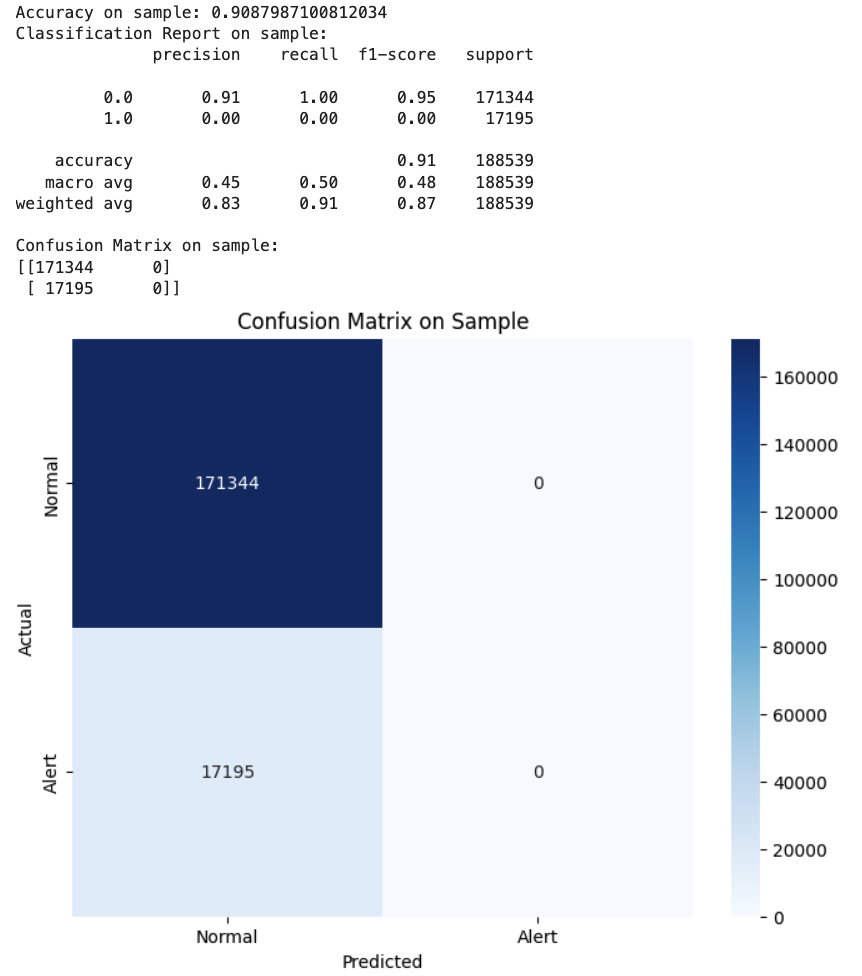)
___

___
# <font color = darkkhaki> M11.CNN (Basic)v--> Did not complete (Ran into Kernel Issues)

In [1]:
# import pandas as pd
# import os
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from imblearn.over_sampling import SMOTE
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import torch.nn.functional as F
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np
# import time

# # ********** Parameters Section **********
# total_sample_size = 0.1*len(df)  # Set this to len(df) to include the full dataset
# sample_size_train_test = int(0.2 * total_sample_size)
# train_test_split_ratio = 0.8  # Define the train/test split ratio
# sample_size_test_predictions = int(sample_size_train_test * (1 - train_test_split_ratio))  # Adjust based on the split ratio
# step_size = int(0.1 * sample_size_test_predictions)  # Define step size as a percentage of sample_size_test_predictions
# learning_rate = 0.001
# num_epochs = 10
# num_filters = 64
# filter_size = 3
# pool_size = 2

# print('Total records:', total_sample_size)
# print('Sample size for train/test:', sample_size_train_test)
# print('Sample size for test predictions:', sample_size_test_predictions)
# print('Step size:', step_size)

# # Start timing
# start_time = time.time()

# # ********** Section 1: Feature Engineering **********

# # Select relevant features and target
# features = df[['Component1', 'Component2', 'Level']]
# target = df['label_binary']

# # One-hot encode categorical features
# encoder = OneHotEncoder(sparse=False)
# features_encoded = encoder.fit_transform(features)

# print("\n" + "_"*100)
# print("Feature Engineering Completed")
# print("Total features encoded shape:", features_encoded.shape)
# print("\n" + "_"*100)

# # ********** Section 2: Initial Train/Test Split **********

# # Split the data into initial training and testing sets
# X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(features_encoded, target, test_size=(1 - train_test_split_ratio), random_state=42)

# print("Initial Data Splitting Completed")
# print("X_train_full shape:", X_train_full.shape)
# print("X_test_full shape:", X_test_full.shape)
# print("y_train_full shape:", y_train_full.shape)
# print("y_test_full shape:", y_test_full.shape)
# print("\n" + "_"*100)

# # ********** Section 3: SMOTE for Balancing the Dataset **********

# # Combine the training data for sampling
# X_full_sample = np.concatenate((X_train_full, X_test_full))
# y_full_sample = np.concatenate((y_train_full, y_test_full))

# print("Full sample combined shape:", X_full_sample.shape)
# print("Full sample target shape:", y_full_sample.shape)

# # Sample size for training/testing, maintaining the imbalance ratio
# minority_class_count = int(sample_size_train_test * 0.1)  # 10% of 100000
# majority_class_count = sample_size_train_test - minority_class_count

# print("Minority class count:", minority_class_count)
# print("Majority class count:", majority_class_count)

# smote = SMOTE(sampling_strategy=0.1, random_state=42)
# X_sampled, y_sampled = smote.fit_resample(X_full_sample, y_full_sample)

# print("SMOTE Sampling Strategy Completed")
# print("X_sampled shape:", X_sampled.shape)
# print("y_sampled shape:", y_sampled.shape)
# print("\n" + "_"*100)

# # ********** Section 4: Train/Test Split for Sampled Data **********

# # Split the sampled data into training and validation sets
# X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=(1 - train_test_split_ratio), random_state=42)

# print("Train/Test Split for Sampled Data Completed")
# print("X_train shape:", X_train.shape)
# print("X_test shape:", X_test.shape)
# print("y_train shape:", y_train.shape)
# print("y_test shape:", y_test.shape)
# print("\n" + "_"*100)

# # ********** Section 5: Convert Data to PyTorch Tensors **********

# # Convert data to PyTorch tensors
# X_train = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)
# X_test = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)
# y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
# y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# print("Data Conversion to PyTorch Tensors Completed")
# print("\n" + "_"*100)

# # ********** Section 6: Define CNN Model **********

# class CNNNetwork(nn.Module):
#     def __init__(self, input_size, num_filters, filter_size, pool_size, output_size):
#         super(CNNNetwork, self).__init__()
#         self.conv1 = nn.Conv1d(1, num_filters, filter_size)
#         self.pool = nn.MaxPool1d(pool_size)
#         self.fc1 = nn.Linear(num_filters * ((input_size - filter_size + 1) // pool_size), output_size)
#         self.sigmoid = nn.Sigmoid()
        
#     def forward(self, x):
#         x = self.pool(F.relu(self.conv1(x)))
#         x = x.view(-1, self.num_flat_features(x))
#         x = self.fc1(x)
#         x = self.sigmoid(x)
#         return x
    
#     def num_flat_features(self, x):
#         size = x.size()[1:]
#         num_features = 1
#         for s in size:
#             num_features *= s
#         return num_features

# input_size = X_train.shape[2]
# output_size = 1

# model = CNNNetwork(input_size, num_filters, filter_size, pool_size, output_size)
# criterion = nn.BCELoss()
# optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# print("CNN Model Defined")
# print("\n" + "_"*100)

# # ********** Section 7: Train the CNN Model **********

# for epoch in range(num_epochs):
#     model.train()
#     outputs = model(X_train)
#     loss = criterion(outputs, y_train)
    
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()
    
#     print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# print("Model Training Completed")
# print("\n" + "_"*100)

# # ********** Section 8: Save Model Locally **********

# # Create the directory if it doesn't exist
# save_dir = '/mnt/efs-w210-capstone/200015/09.Models/20240625_Baseline_CNN_PyTorch'
# os.makedirs(save_dir, exist_ok=True)

# # Save the model
# model_path = os.path.join(save_dir, 'cnn_model.pth')
# torch.save(model.state_dict(), model_path)

# print(f"Model saved to {save_dir}")
# print("\n" + "_"*100)

# # ********** Section 9: Load Saved Model **********

# # Load the model
# model_loaded = CNNNetwork(input_size, num_filters, filter_size, pool_size, output_size)
# model_loaded.load_state_dict(torch.load(model_path))

# print("Model Loading from Local Completed")
# print("\n" + "_"*100)

# # ********** Section 10: Review Model **********

# # Print model attributes
# print(model_loaded)

# print("Model Review Completed")
# print("\n" + "_"*100)

# # ********** Section 11: Analyze **********

# # Take a small sample of the test set for prediction
# X_test_sample = X_test[:sample_size_test_predictions]
# y_test_sample = y_test[:sample_size_test_predictions]

# # Initialize a list to collect predictions in steps of `step_size`
# y_pred_sample = []

# print(f'Processing {sample_size_test_predictions} records in steps of {step_size}...')

# # Make predictions in steps of `step_size` records
# model_loaded.eval()
# with torch.no_grad():
#     for i in range(0, sample_size_test_predictions, step_size):
#         end = i + step_size if i + step_size < sample_size_test_predictions else sample_size_test_predictions
#         outputs = model_loaded(X_test_sample[i:end])
#         y_pred_sample.extend(outputs.squeeze().numpy())
#         print(f'Processed {end} records...')

# # Convert predictions list to numpy array and binarize
# y_pred_sample = np.array(y_pred_sample)
# y_pred_sample = (y_pred_sample > 0.5).astype(int)

# # Evaluate the model on the sample
# accuracy = accuracy_score(y_test_sample, y_pred_sample)
# report = classification_report(y_test_sample, y_pred_sample)

# print(f'Accuracy on sample: {accuracy}')
# print(f'Classification Report on sample:\n{report}')

# # Confusion matrix for the sample
# conf_matrix = confusion_matrix(y_test_sample, y_pred_sample)
# print(f'Confusion Matrix on sample:\n{conf_matrix}')

# # Plot confusion matrix with class names
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Alert'], yticklabels=['Normal', 'Alert'])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix on Sample')
# plt.show()

# print("Analysis Completed")
# print("\n" + "_"*100)

# # ********** Section 12: Display Inference Results **********

# # Create a DataFrame with the sample data
# results_df = pd.DataFrame(X_test_sample.squeeze().numpy(), columns=encoder.get_feature_names_out(df[['Component1', 'Component2', 'Level']].columns))

# # Add actual_label and predicted_label columns
# results_df['actual_label'] = y_test_sample.numpy()
# results_df['predicted_label'] = y_pred_sample

# # Display the first 10 rows of the results
# print("\n" + "*"*100)
# print("**************** Section 12: Display Inference Results **********")
# print("*"*100 + "\n")

# display(results_df.head(10))
# print("\n" + "_"*100)

# # End timing
# end_time = time.time()
# duration = end_time - start_time
# print("\n" + "_"*100)
# print(f"\nTotal Time taken: {duration:.2f} seconds")
# print("\n" + "_"*100)

___

#### <font color = tomato>Results Backup
> 
> 
___

___
# <font color = darkkhaki> M.

___

#### <font color = tomato>Results Backup
> 
> 
___

___
# <font color = darkkhaki> M

___

#### <font color = tomato>Results Backup
> 
> 
___

___
# <font color = darkkhaki> M

___

#### <font color = tomato>Results Backup
> 
> 
___